In [7]:
from sqlalchemy import create_engine
from sqlalchemy.orm import sessionmaker
from Model import Player, Team, Confrontation, LineUp
import numpy as np
from tqdm import tqdm
import pandas as pd
from utils import *
from distance import *
import seaborn as sns
from safety_technique_stats import *
plt.rcParams["figure.figsize"] = (16,9)
pd.set_option('display.max_colwidth', None)
pd.set_option("display.max_columns", None)
pd.set_option('display.colheader_justify', 'center')

In [8]:
def center(content):
    display(HTML(f"<hr/><div style='text-align:center'>{content}</div><hr/>"))

In [9]:
engine = create_engine("sqlite:///../2009-2010.db",echo = False)

Session = sessionmaker()
Session.configure(bind=engine)

global session
session = Session()

teams = session.query(Team).all()

players = session.query(Player).all()

confrontations = session.query(Confrontation).all()

lineups = session.query(LineUp).all()


# Introduction

<p style="font-size: 14px; font-family: roboto">In this internship we are interested in extracting a ranking over the players of an NBA team 2009-10 season using the play by play data for that season available <a href="http://www.basketballgeek.com/downloads/2009-2010/"> on this link</a>.</p> 
    <p style="font-size: 14px; font-family: roboto">In order to extract a ranking over the players of the same team we use state of art methods used to find ordinal power indices. These method have different requirements but the minimal requirement in order to use any of them is that for every player there has to be a coalition to which the player belongs that can be comparer to another coalition to which the player doesn't belong. To have a better understanding of the project at hand it is important to know that the only coalitions that are available in the context of basketball are the coalitions of size 5, and that not all coalitions of size 5 are available or can be compared against each other since a majority of those coalitions are never picked because of many reasons the main one being that players in basketball have specific positions and can't play with players that have the same position as them. The first task of this project was to extract all the coalitions of size 5 that have been picked to play during the NBA season of 2009-10.This tasks led us to preprocess the data  and normalize it using a database model for the purpose of storing it in a relationnal database. </p>
<p style="font-size: 14px; font-family: roboto">Once we successfully gathered all these coalitions,we will refer to them as lineups, we need a robust method to compare two lineups of the same team against each other.In order to find a reliable way of ranking lineups, we coduct a statistical analysis on the data. This analysis led us to suggest three apporaches that we use to rank lineups of the same team. These approaches are the following
    <ul>
        <li><strong>Scoring.</strong></li>
        <li><strong>Pareto dominonace.</strong></li>
        <li><strong>Witness lineups.</strong></li>
    </ul>
</p>
<p style="font-size: 14px; font-family: roboto">These apporaches will be elaborated later on.</p>
<p style="font-size: 14px; font-family: roboto">After generating a ranking over the lineups of a same team, we <strong><em>Ceteris paribus majority</em> (CP-Majority)</strong>  and <strong><em>Lexicographical order</em>    (Lex) </strong>  for the purpose of comparing two players against each other.</p>

<p style="font-size: 14px; font-family: roboto">In the end, we compare the rankingof the players we find to the rankings of players made by NBA on basis of the <strong>Kendall Tau distance</strong></p>


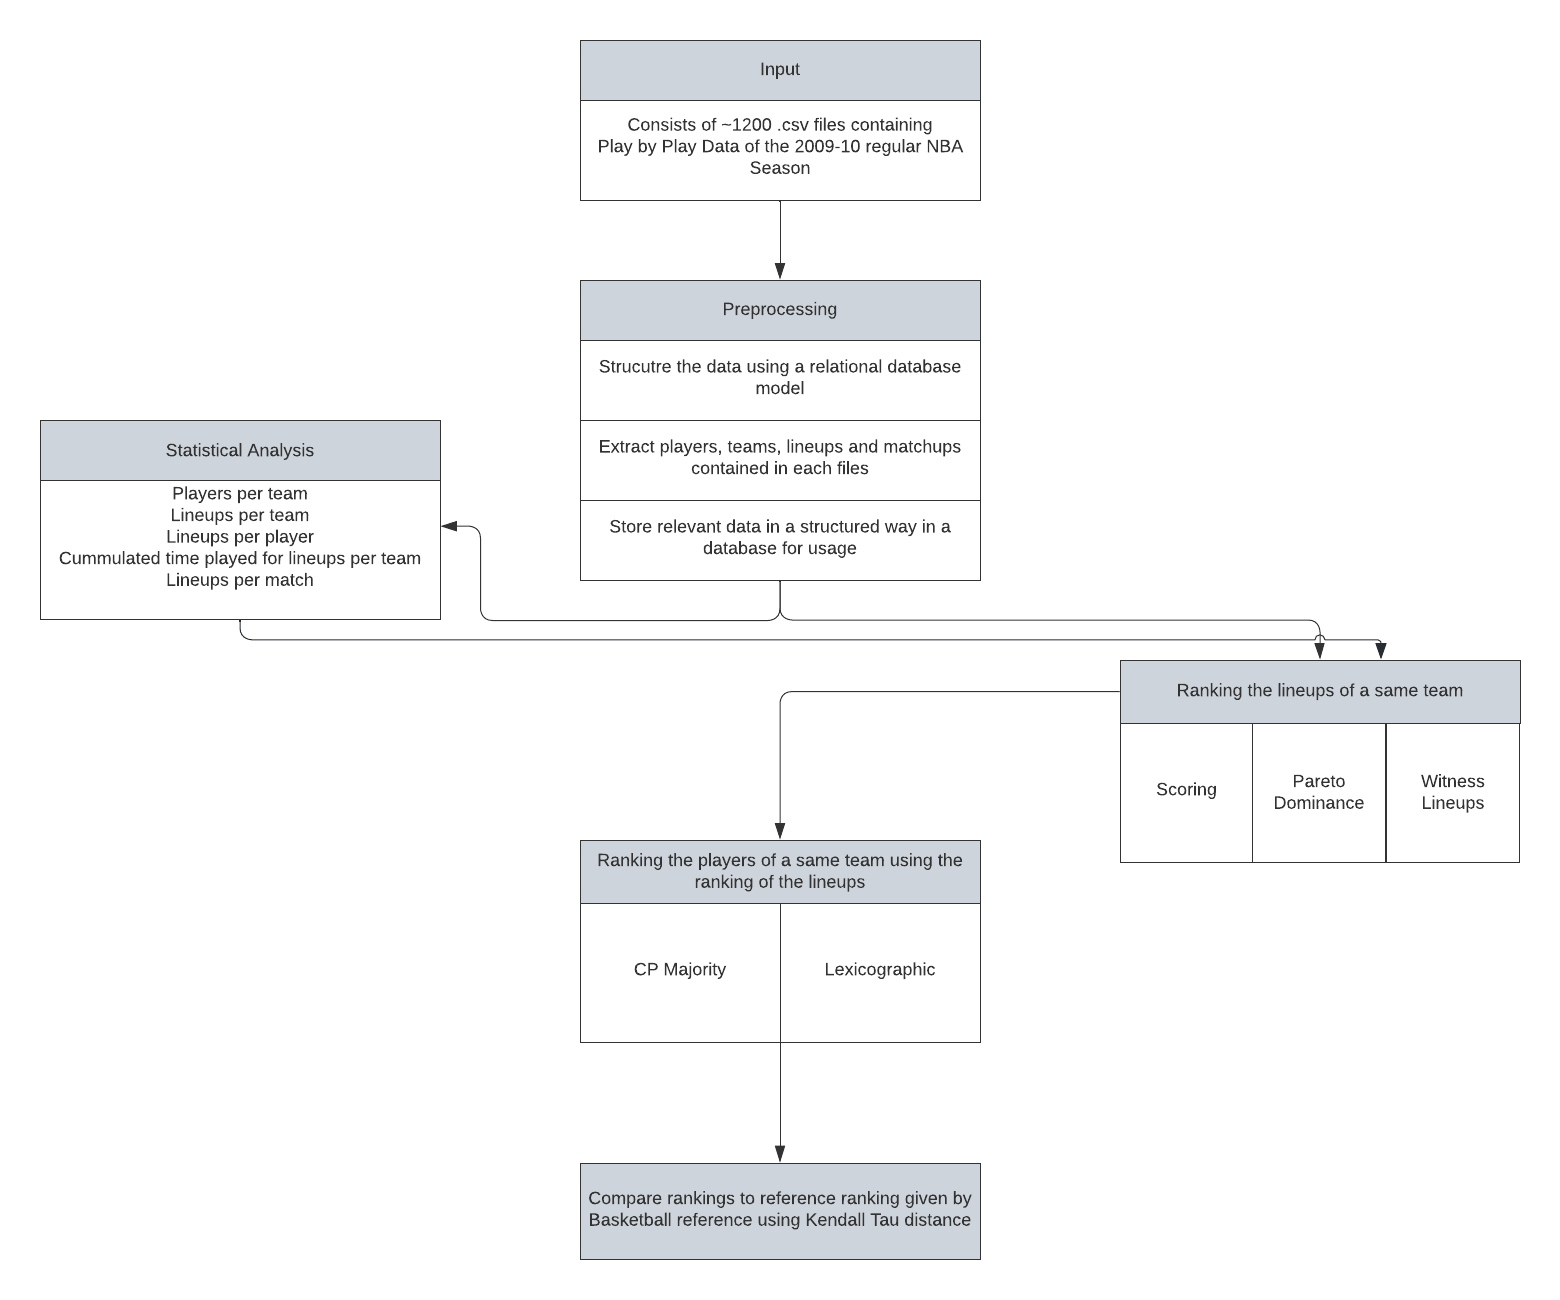

# Comparision between rankings
<p style="font-size: 14px; font-family: roboto">
The ceteris paribus rule gives us non transitive preferences over the set of players. In order to solve the cyclic preferences problem we use the <em>Copland</em> rule and the <em>Krammer Simpson</em> rule to break the cycles generated by the ceteris paribus rule. </p>
<p style="font-size: 14px; font-family: roboto">
From this point on, we chose to focus our analysis on on team in particular, in order to have elss complex results. The choice of the team was random, the team that was chosen is the Oklahoma Thunders.If the reader wants to change the team and conduct the same analysis, it is necessary to change the value of the `TEAM_INDEX` variable to the index of the team of his choice.  
</p>
<p style="font-size: 14px; font-family: roboto">
In what follows we will examine the rankings given from three distinct approaches of ranking the lineups.these approaches are described in what follows:
</p>

    

## Scoring 

<p style="font-size: 14px; font-family: roboto">In which every lineup of the same team is a assigned a score that consist in the difference between number of points scored and the number of points conceided by the lineup over the total amount of seconds played by the lineup. We then rank those lineups on basis of that score. <br/>The following figure explains the process of lineup ranking of this approach.</p>
<hr>


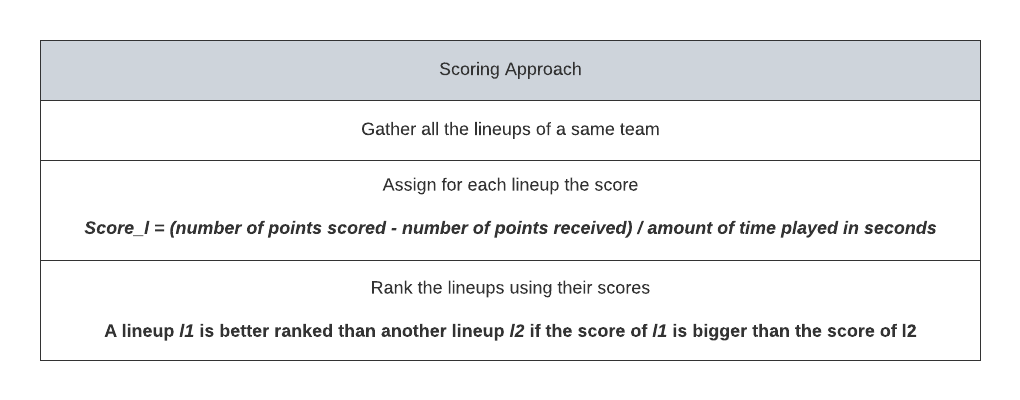

### Example

<hr>
<p style="font-size: 14px; font-family: roboto;margin: 20px;"><strong style="color: #BB0000AA;">Please read this section carefully since this example will be used through out the whole document.</strong><br/>
    Consider <strong>two</strong> Teams <em>T1</em>, <em>T2</em> with <strong>6 players each</strong>.<br/>
    The following table shows the players of each team.</p>
<table>
  <tr>
    <th style= "text-align: center;">T1</th>
    <th style= "text-align: center;">T2</th>
  </tr>
  <tr>
    <td>P11</td>
    <td>P21</td>
    
  </tr>
  <tr>
    <td>P12</td>
    <td>P22</td>
    
  </tr><tr>
    <td>P13</td>
    <td>P23</td>
    
  </tr><tr>
    <td>P14</td>
    <td>P24</td>
    
  </tr><tr>
    <td>P15</td>
    <td>P25</td>
    
  </tr>
  <tr>
    <td>P16</td>
    <td>P26</td>
    
  </tr>
</table>
<hr>
<p style="font-size: 14px; font-family: roboto;margin: 20px;">
    For each team, the several lineups that are picked to play are the following</p>
<table>
    <tr>
        <th style= "text-align: center;">T1</th>
        <th style= "text-align: center;">T2</th>
    </tr>
    <tr>
        <td> {P11, P12, P13, P14, P15}</td>
        <td> {P21, P22, P23, P24, P25}</td>  
    </tr>
    <tr>
        <td> {P11, P16, P13, P14, P15}</td>
        <td> {P21, P22, P26, P24, P25}</td>
    </tr>
    <tr>
        <td> {P11, P12, P13, P16, P15}</td>
        <td> {P26, P22, P23, P24, P25}</td>

  </tr><tr>
    <td> {P11, P12, P13, P14, P16}</td>
    <td> {P21, P22, P23, P26, P25}</td>
  </tr>
</table>
<hr>
<p style="font-size: 14px; font-family: roboto; margin: 20px;">
    The list of confrontations between lineups is given in the table below</p>
    <table>
        <tr>
            <th style= "text-align: center;">Lineup T1</th>
            <th style= "text-align: center;">Lineup T2</th>
            <th style= "text-align: center;">Score T1</th>
            <th style= "text-align: center;">Score T2</th>
            <th style= "text-align: center;">Duration (s)</th>
        </tr>
        <tr>
            <td  style= "text-align: center;"> {P11, P12, P13, P14, P15}</td>
            <td  style= "text-align: center;"> {P21, P22, P23, P24, P25}</td>
            <td  style= "text-align: center;"> 15</td>
            <td  style= "text-align: center;"> 21</td>
            <td  style= "text-align: center;"> 300</td>
        </tr>
        <tr>
            <td  style= "text-align: center;"> {P11, P12, P13, P14, P15}</td>
            <td  style= "text-align: center;"> {P26, P22, P23, P24, P25}</td>
            <td  style= "text-align: center;"> 9</td>
            <td  style= "text-align: center;"> 6</td>
            <td  style= "text-align: center;"> 110</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P14, P15}</td>
            <td style= "text-align: center;"> {P21, P22, P26, P24, P25}</td>
            <td style= "text-align: center;"> 24</td>
            <td style= "text-align: center;"> 10</td>
            <td style= "text-align: center;"> 240</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P14, P15}</td>
            <td style= "text-align: center;"> {P21, P22, P23, P26, P25}</td>
            <td style= "text-align: center;"> 8</td>
            <td style= "text-align: center;"> 8</td>
            <td style= "text-align: center;"> 70</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P16, P13, P14, P15}</td>
            <td style= "text-align: center;"> {P21, P22, P23, P24, P25}</td>
            <td style= "text-align: center;"> 25</td>
            <td style= "text-align: center;"> 12</td>
            <td style= "text-align: center;"> 250</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P16, P15}</td>
            <td style= "text-align: center;"> {P21, P22, P23, P24, P25}</td>
            <td style= "text-align: center;"> 18</td>
            <td style= "text-align: center;"> 19</td>
            <td style= "text-align: center;"> 170</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P14, P16}</td>
            <td style= "text-align: center;"> {P21, P22, P23, P24, P25}</td>
            <td style= "text-align: center;"> 2</td>
            <td style= "text-align: center;"> 4</td>
            <td style= "text-align: center;"> 35</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P16, P13, P14, P15}</td>
            <td style= "text-align: center;"> {P26, P22, P23, P24, P25}</td>
            <td style= "text-align: center;"> 7</td>
            <td style= "text-align: center;"> 4</td>
            <td style= "text-align: center;"> 60</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P14, P15}</td>
            <td style= "text-align: center;"> {P21, P22, P23, P24, P25}</td>
            <td style= "text-align: center;"> 32</td>
            <td style= "text-align: center;"> 20</td>
            <td style= "text-align: center;"> 600</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P14, P15}</td>
            <td style= "text-align: center;"> {P26, P22, P23, P24, P25}</td>
            <td style= "text-align: center;"> 7</td>
            <td style= "text-align: center;"> 12</td>
            <td style= "text-align: center;"> 85</td>
        </tr>
        <tr>
            <td style= "text-align: center;"> {P11, P12, P13, P14, P16}</td>
            <td style= "text-align: center;"> {P21, P22, P23, P26, P25}</td>
            <td style= "text-align: center;"> 1</td>
            <td style= "text-align: center;"> 3</td>
            <td style= "text-align: center;"> 30</td>
        </tr>
</table>
<hr>
<p style="font-size: 14px; font-family: roboto;margin: 20px;">The following tables shows the score of each lineup for each team when using the <em><strong>scoring</strong></em> approach</p>
<div style="display:flex;padding: 10px;">
    <div style="padding:10px 100px;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px; text-align:center;"><strong>Team T1</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Lineup</th>
                <th style= "text-align: center;">Score</th>
            </tr>
            <tr>
                <td style= "text-align: center;">{P11, P12, P13, P14, P15}</td>
                <td style= "text-align: center;">0.013</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P11, P16, P13, P14, P15}</td>
                <td style= "text-align: center;">0.052</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P11, P12, P13, P16, P15}</td>
                <td style= "text-align: center;">-0.006</td>
            </tr>
            <tr>
                <td style= "text-align: center;"> {P11, P12, P13, P14, P16}</td>
                <td style= "text-align: center;">-0.062</td>
            </tr>
        </table>
    </div>
    <div style="padding:10px 100px;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px;text-align:center;"><strong>Team T2</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Lineup</th>
                <th style= "text-align: center;">Score</th>
            </tr>
            <tr>
                <td style= "text-align: center;">{P21, P22, P23, P24, P25}</td>
                <td style= "text-align: center;">-0.012</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P21, P22, P26, P24, P25}</td>
                <td style= "text-align: center;">-0.058</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P26, P22, P23, P24, P25}</td>
                <td style= "text-align: center;">-0.004</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P21, P22, P23, P26, P25}</td>
                <td style= "text-align: center;">0.020</td>
            </tr>
        </table>
    </div>
</div>
<p style="font-size: 14px; font-family: roboto;margin: 20px;">Thus, with this approach the ranking of the lineups is the following: </p>
<div style="display: flex;">
    <div style="margin:auto;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px;text-align:center;"><strong>Team T1</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Rank</th>
                <th style= "text-align: center;">Lineup</th>
            </tr>
            <tr>
                <td style= "text-align: center;">1</td>
                <td style= "text-align: center;">{P11, P16, P13, P14, P15}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">2</td>
                <td style= "text-align: center;">{P11, P12, P13, P14, P15}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">3</td>
                <td style= "text-align: center;">{P11, P12, P13, P16, P15}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">4</td>
                <td style= "text-align: center;">{P11, P12, P13, P14, P16}</td>
            </tr>
        </table>
    </div>
    <div style="margin:auto;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px;text-align:center;"><strong>Team T2</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Rank</th>
                <th style= "text-align: center;">Lineup</th>
            </tr>
            <tr>
                <td style= "text-align: center;">1</td>
                <td style= "text-align: center;">{P21, P22, P23, P26, P25}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">2</td>
                <td style= "text-align: center;">{P26, P22, P23, P24, P25}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">3</td>
                <td style= "text-align: center;">{P21, P22, P23, P24, P25}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">4</td>
                <td style= "text-align: center;">{P21, P22, P26, P24, P25}</td>
            </tr>
        </table>
    </div>
</div>
    

<p style="font-size: 14px; font-family: roboto;">
    <ul>
        <hr>
        <li  style="font-size: 14px; font-family: roboto"><strong>pareto dominance</strong>: in this approach , instead of considering the score of lineup as an aggreation function (the difference) of the number of points scored per second and the number of points conceded per second by a lineup, we consider each one of them as criteria that are both to maximize. Each lineup will want to maximize <div style= "text-align: center;"><strong>(nb points it scores per second</strong>,   <strong> - nb points it concedes per second)</strong></div> In order to extract an ordering on the lineups we then use an iterated pareto front construction procedure, where each front is put an equivalence class that is ranked higer than all the following equivalance classes and lower than all the previous equivalence classes.<br/> The following figure explains how we use this approach to rank lineups</li>
   </ul>
   <hr>
</p>


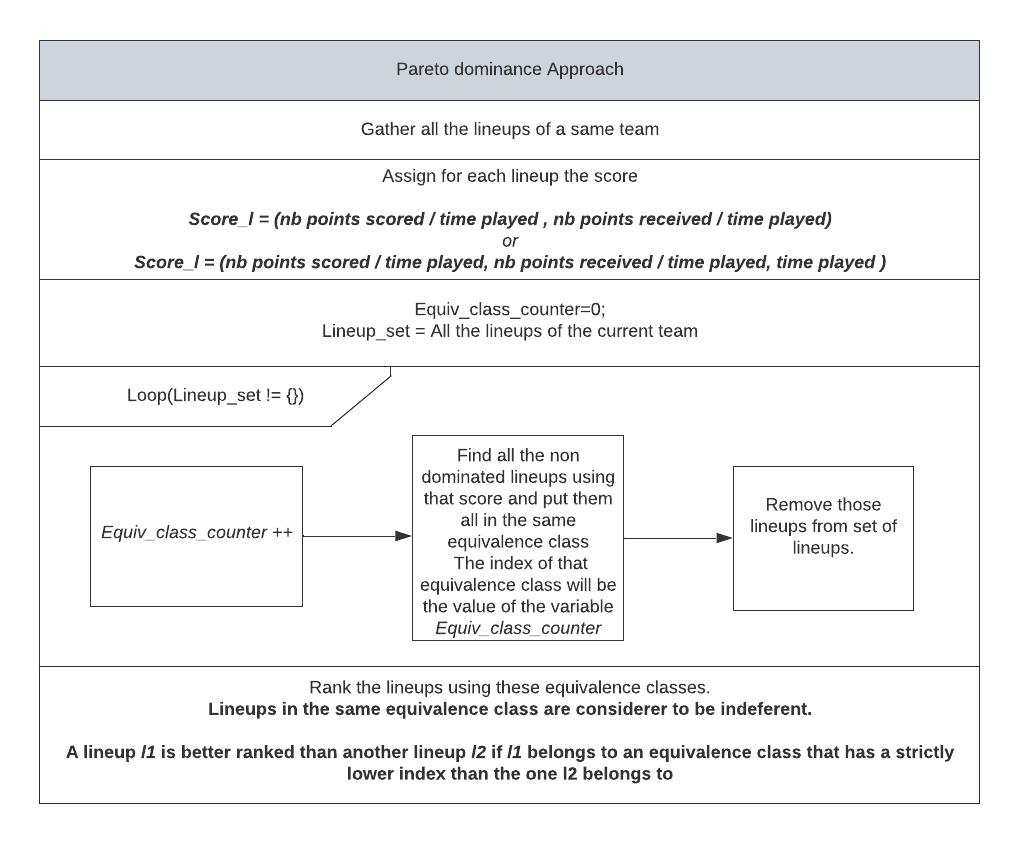

### Example

<p style="font-size: 14px; font-family: roboto">We use the same lineups and matchups from the example above to illustrate the ranking over the lineup obtained when applying the <strong>pareto dominance approach</strong>.
</p>
<hr>
<p style="font-size: 14px; font-family: roboto">
The following table shows the score of each lineup for each team when using the <strong>pareto dominance approach</strong>
</p><div style="padding: 10px;">
    <div style="padding:10px 100px;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px; text-align:center;"><strong>Team T1</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Lineup</th>
                <th style= "text-align: center;">Score</th>
            </tr>
            <tr>
                <td style= "text-align: center;">{P11, P12, P13, P14, P15}</td>
                <td style= "text-align: center;">(0.068, -0.055)</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P11, P16, P13, P14, P15}</td>
                <td style= "text-align: center;">(0.103,-0.052)</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P11, P12, P13, P16, P15}</td>
                <td style= "text-align: center;">(0.106,-0.112)</td>
            </tr>
            <tr>
                <td style= "text-align: center;"> {P11, P12, P13, P14, P16}</td>
                <td style= "text-align: center;">(0.046,-0.108)</td>
            </tr>
        </table>
    </div>
    <div style="padding:10px 100px;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px;text-align:center;"><strong>Team T2</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Lineup</th>
                <th style= "text-align: center;">Score</th>
            </tr>
            <tr>
                <td style= "text-align: center;">{P21, P22, P23, P24, P25}</td>
                <td style= "text-align: center;">(0.056,-0.068)</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P21, P22, P26, P24, P25}</td>
                <td style= "text-align: center;">(0,086,-0.090)</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P26, P22, P23, P24, P25}</td>
                <td style= "text-align: center;">(0,042,-0.100)</td>
            </tr>
            <tr>
                <td style= "text-align: center;">{P21, P22, P23, P26, P25}</td>
                <td style= "text-align: center;">(0.110,-0.090)</td>
            </tr>
        </table>
    </div>
</div>
<p style="font-size: 14px; font-family: roboto;margin: 20px;">Thus, with this approach the ranking of the lineups is the following: </p>
<div style="display: flex;">
    <div style="margin:auto;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px;text-align:center;"><strong>Team T1</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Rank</th>
                <th style= "text-align: center;">Lineup</th>
            </tr>
            <tr>
                <td style= "text-align: center;">1</td>
                <td style= "text-align: center;">{P11, P16, P13, P14, P15}</td>
            </tr>
             <tr>
                <td style= "text-align: center;">1</td>
                <td style= "text-align: center;">{P11, P12, P13, P16, P15}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">3</td>
                <td style= "text-align: center;">{P11, P12, P13, P14, P15}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">4</td>
                <td style= "text-align: center;">{P11, P12, P13, P14, P16}</td>
            </tr>
        </table>
    </div>
    <div style="margin:auto;">
        <p style="font-size: 14px; font-family: roboto;margin: 20px;text-align:center;"><strong>Team T2</strong></p>
        <table>
            <tr>
                <th style= "text-align: center;">Rank</th>
                <th style= "text-align: center;">Lineup</th>
            </tr>
            <tr>
                <td style= "text-align: center;">1</td>
                <td style= "text-align: center;">{P21, P22, P23, P26, P25}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">1</td>
                <td style= "text-align: center;">{P21, P22, P23, P24, P25}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">3</td>
                <td style= "text-align: center;">{P21, P22, P26, P24, P25}</td>
            </tr>
            <tr>
                <td style= "text-align: center;">4</td>
                <td style= "text-align: center;">{P26, P22, P23, P24, P25}</td>
            </tr>
        </table>
    </div>
</div>



<p style="font-size: 14px; font-family: roboto">
    <ul>
        <hr>
        <li  style="font-size: 14px; font-family: roboto"><strong>Witness lineups</strong>: in this approach , instead of using a score computed using the overall number of points scored and received by each lineup, in order to compare a pair of lineups , we use the <strong>common opponent lineups</strong> they have to compare them. In ordre to extract a ranking of the lineups of a team, first, the matrix of pairwise comparisions between each pair of lineups is generated .<br/> In ordre to compare two lineups <em>l1</em> and <em>l2</em>, if these two lineups don't have common opponents then we use a fallback approach which can be eithet the <strong>scoring apporach</strong> or the <strong>pareto dominance approach</strong>.On the other hand if these two lineups share common opponents,then for one specific opponent <em>o</em> the score of each lineup against that opponent is computed (using the same definition of score as the scoring approach, but restraining the confrontation to only the confrontation that involve this opponent). The scores of both lineups are compared and the opponent lineup will vote for the lineup who beats the other. The voting process is weighted by giving to each of the opponent lineups the min between the time played against the two lineups compared as a weight.<br/>Once the matrix of pairwise comparisions between each pair of lineups is generated, the <strong><em>Copeland</em> technique</strong> is used to break any eventual cycles that exist in that ranking thereby obtaining a <strong>transitive ranking over the lineups of a same team</strong>. <br/> The following figure explains how we use this approach to rank lineups</li>
   </ul>
   <hr>
</p>


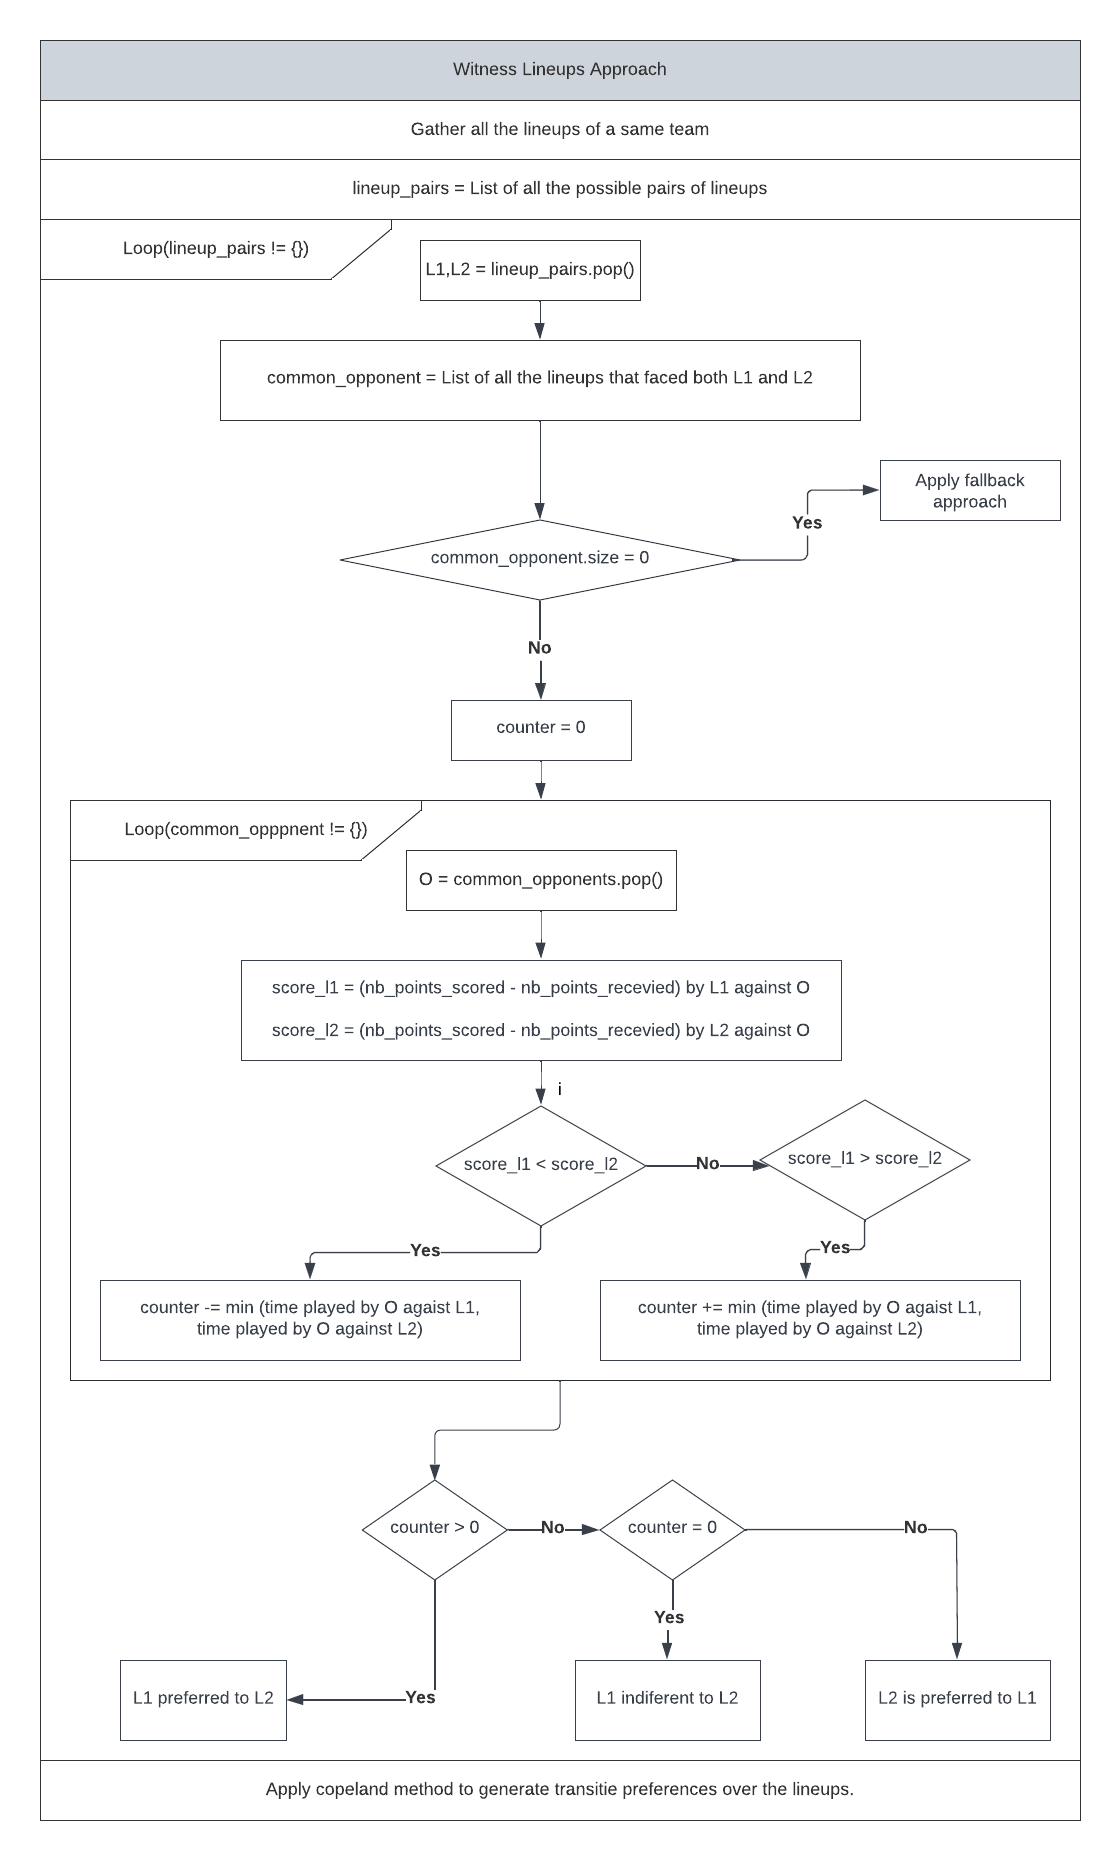

In [4]:
TEAM_INDEX = 16
TEAM_PLAYERS = teams[TEAM_INDEX].players(session)
VORP_ranking = get_NBA_player_ranking(teams[TEAM_INDEX].team_name, "VORP")
pts_ranking = get_NBA_player_ranking(teams[TEAM_INDEX].team_name, "Points")
WAR_ranking = get_NBA_player_ranking(teams[TEAM_INDEX].team_name, "WAR")
raptor_ranking = get_NBA_player_ranking(teams[TEAM_INDEX].team_name, "RAPTOR")
df_VORP = ranking_to_df(VORP_ranking)
df_pts = ranking_to_df(pts_ranking)
df_war = ranking_to_df(WAR_ranking)
df_raptor = ranking_to_df(raptor_ranking)
df_time = ranking_to_df(teams[TEAM_INDEX].time_based_player_ranking(session))
base_nba = sorted([i[0] for i in VORP_ranking])
base_db = sorted([i.name for i in TEAM_PLAYERS])
index = ["VORP", "Pts ranking","WAR", "RAPTOR","Time played",
         "KS", "Copland", "Top Cycle",
         "Lexicographic", "Borda", "STV"]

## Rankings of the players using the scoring approach

#### Using pairwise comparisions

##### with CP majority

In [24]:
ranking_ks_cp_scoring = teams[TEAM_INDEX].krammer_simpson(session, Player.ceteris_paribus,"scoring", penality=True, show_heatmap=False)
df_ks_cp_scoring = ranking_to_df(ranking_ks_cp_scoring, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00,  9.03it/s]


In [25]:
ranking_copeland_cp_scoring = teams[TEAM_INDEX].copeland(session, Player.ceteris_paribus,"scoring", penality=True, show_heatmap=False)
df_copeland_cp_scoring = ranking_to_df(ranking_copeland_cp_scoring, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00,  8.34it/s]


In [26]:
ranking_equiv_cycles_cp_scoring = teams[TEAM_INDEX].connected_components_equiv(session, Player.ceteris_paribus, "scoring", penality=True,show_heatmap=False)
df_equiv_cycles_cp_scoring = ranking_to_df(ranking_equiv_cycles_cp_scoring, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00, 10.16it/s]


#### Using lexicographic majority

In [27]:
ranking_l5_star_scoring = teams[TEAM_INDEX].rank_players(session, Player.l5_star, "scoring", show_heatmap= False)
df_l5_star_scoring = ranking_to_df(ranking_l5_star_scoring, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 32.29it/s]


### Scoring approaches

In [28]:
ranking_borda_scoring = teams[TEAM_INDEX].borda_ranking(session, "scoring")
df_borda_scoring = ranking_to_df(ranking_borda_scoring, TEAM_PLAYERS)

In [29]:
ranking_wborda_scoring = teams[TEAM_INDEX].scoring_ranking(session)
df_wborda_scoring = ranking_to_df(ranking_wborda_scoring, TEAM_PLAYERS)

In [30]:
ranking_stv_scoring = teams[TEAM_INDEX].stv_based_ranking(session, "scoring", False, None)
df_stv_scoring = ranking_to_df(ranking_stv_scoring, TEAM_PLAYERS)

### Summary

In [31]:
df = pd.concat([df_ks_cp_scoring,
                df_copeland_cp_scoring,
                df_equiv_cycles_cp_scoring,
                df_l5_star_scoring,
                df_borda_scoring,
                df_wborda_scoring,
                df_stv_scoring,
                df_VORP, df_pts, df_war, df_raptor ,df_time], axis=1)
df.columns = ["KS_CP", "Copland_CP", "cycle => Equiv_CP","LP*", 
              "Borda","weighted borda" ,"STV" ,"VORP ranking",
              "points ranking","WAR ranking","Raptor ranking","Time played"]
df.index = pd.Index(range(1, len(df.index)+1),name='rank')
df.columns = pd.Index(df.columns, name='Technique Used')
df_summary_scoring = df.fillna("/")
make_pretty_df(df_summary_scoring)



### Critical cases

In [32]:
make_pretty_df(teams[TEAM_INDEX].critical_cases(session, ranking_to_ballot(VORP_ranking, base_nba),"scoring", False, None))

### Pairwise comparisions with safety

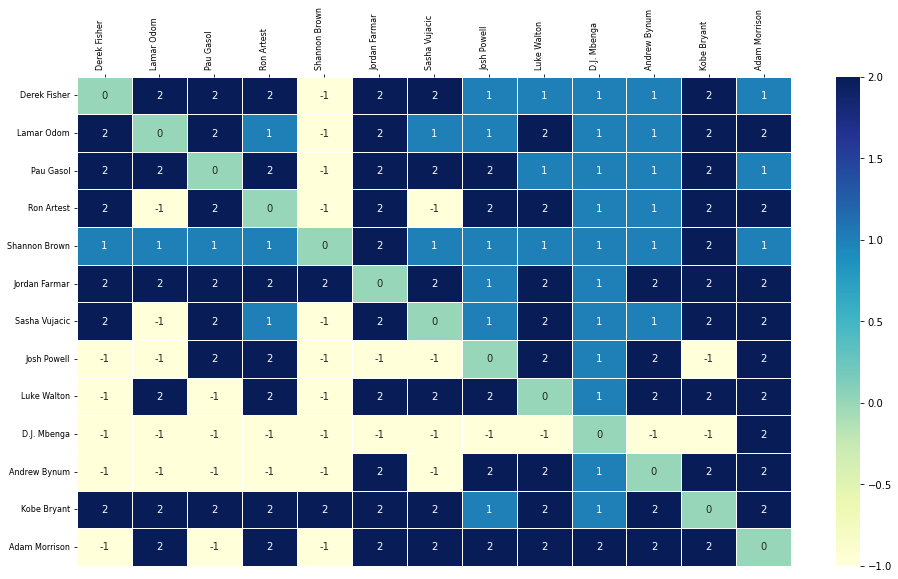

In [33]:
ranking_to_heatmap(teams[TEAM_INDEX].safety_comparaision(session, [ranking_borda_scoring, 
                                                ranking_ks_cp_scoring, 
                                                ranking_copeland_cp_scoring, 
                                                ranking_equiv_cycles_cp_scoring,
                                                ranking_l5_star_scoring, 
                                                ranking_stv_scoring]),TEAM_PLAYERS)

### Average number of comparisions with safety

In [34]:
data = average_number_comp(session, "scoring", time_criterion= False, fallback=None)

100%|███████████████████████████████████████████| 30/30 [03:37<00:00,  7.26s/it]


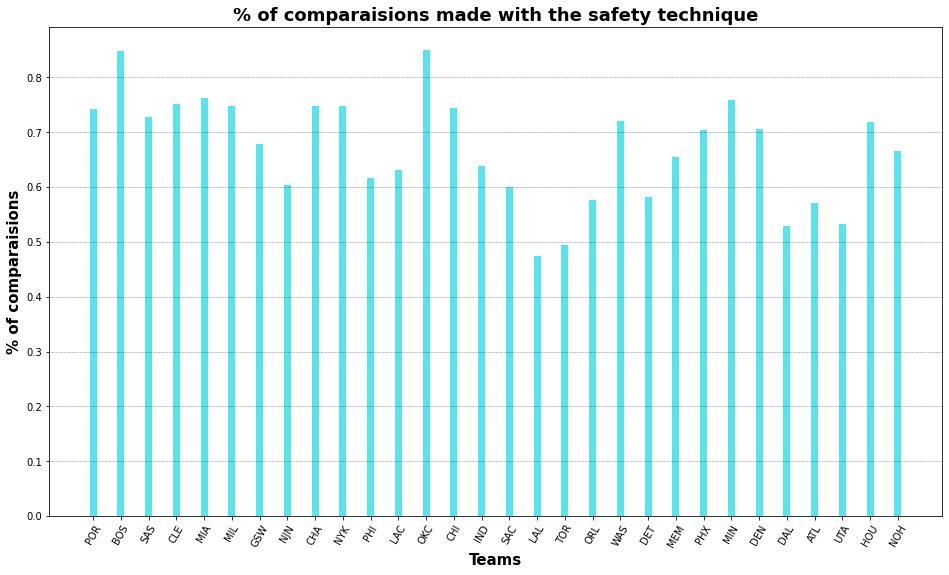

In [35]:
bar_width = 0.25
br1 = np.arange(len(teams))
plt.bar(br1, data ,color ='#42DFEBDD', width = bar_width, edgecolor ='#00000000')
plt.title("% of comparaisions made with the safety technique", fontweight ='bold', fontsize = 18)
plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('% of comparaisions', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(teams))],[t.team_name for t in teams], rotation = 60)
plt.grid(color='#11111155', linestyle=':', linewidth=.5, axis = "y")
plt.show()

<hr/>
<div style='text-align:center; font-weight:bold;'>Average number of comparaisions using safety : 66.83%</div>
<hr/>    

<div style='text-align:center; font-weight:bold;'>Std of comparaisions using safety : 0.099</div>
<hr/>   

### Accuracy of safety approach

In [36]:
df = measure_safety_accuracy(session , "scoring", False, None)

100%|███████████████████████████████████████████| 30/30 [03:52<00:00,  7.76s/it]


In [37]:
make_pretty_df(pd.DataFrame(df)).format('{:.2f}')

### Average distance between each ranking  

In [101]:
tau, ro = distance_matrix(session, teams, "scoring")

100%|███████████████████████████████████████████| 30/30 [07:55<00:00, 15.83s/it]


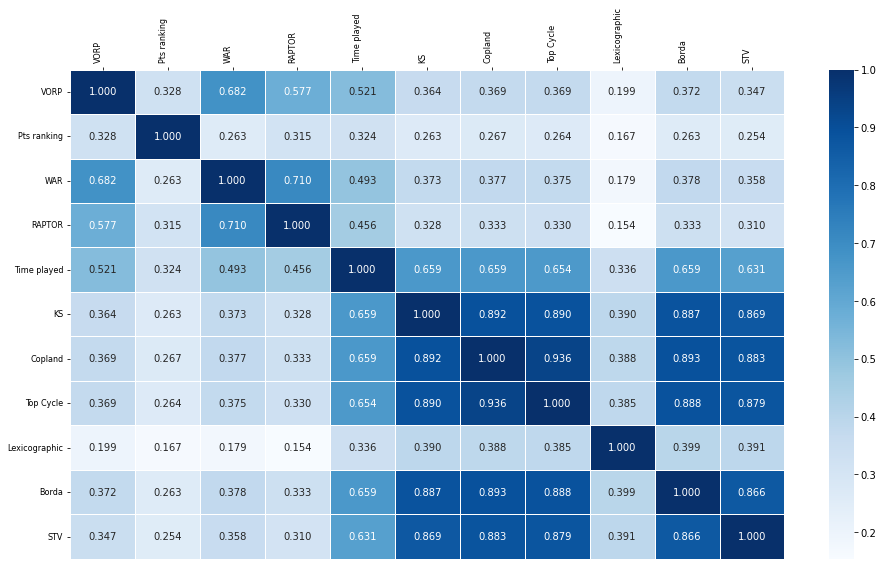

In [102]:
g = sns.heatmap(tau,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

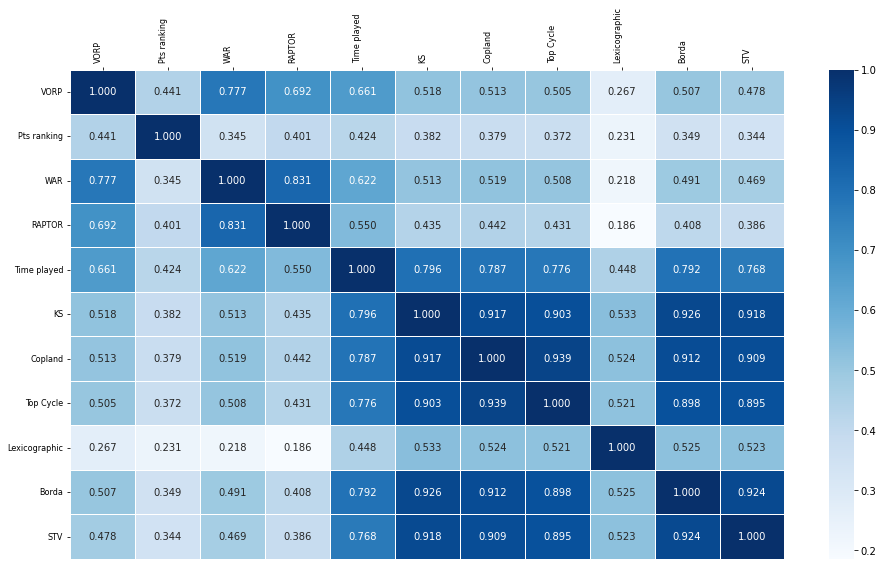

In [103]:
g = sns.heatmap(ro,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

## Rankings of the players using the pareto dominance approach

### Without Time criterion

##### Using CP majority

In [43]:
ranking_ks_cp_pareto_no_time = teams[TEAM_INDEX].krammer_simpson(session,Player.ceteris_paribus, "pareto_dominance", penality=True, show_heatmap = False)
df_ks_cp_pareto_no_time = ranking_to_df(ranking_ks_cp_pareto_no_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 17.24it/s]


In [44]:
ranking_copeland_cp_pareto_no_time = teams[TEAM_INDEX].copeland(session,Player.ceteris_paribus, "pareto_dominance", penality=True, show_heatmap=False)
df_copeland_cp_pareto_no_time = ranking_to_df(ranking_copeland_cp_pareto_no_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 16.61it/s]


In [45]:
ranking_equiv_cycles_cp_pareto_no_time = teams[TEAM_INDEX].connected_components_equiv(session,Player.ceteris_paribus, "pareto_dominance", penality=True, show_heatmap=False)
df_equiv_cycles_cp_pareto_no_time = ranking_to_df(ranking_equiv_cycles_cp_pareto_no_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 13.47it/s]


#### Using lexicographic majority

In [46]:
ranking_l5_star_pareto_no_time = teams[TEAM_INDEX].rank_players(session, Player.l5_star, "pareto_dominance",show_heatmap=False)
df_l5_star_pareto_no_time = ranking_to_df(ranking_l5_star_pareto_no_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 35.27it/s]


### Scoring approaches

In [47]:
ranking_borda_pareto_no_time = teams[TEAM_INDEX].borda_ranking(session, "pareto_dominance")
df_borda_pareto_no_time = ranking_to_df(ranking_borda_pareto_no_time, TEAM_PLAYERS)

In [48]:
ranking_stv_pareto_no_time = teams[TEAM_INDEX].stv_based_ranking(session, "pareto_dominance", False, None)
df_stv_pareto_no_time = ranking_to_df(ranking_stv_pareto_no_time, TEAM_PLAYERS)

### Summary

In [49]:
df = pd.concat([df_ks_cp_pareto_no_time, 
                df_copeland_cp_pareto_no_time,
                df_equiv_cycles_cp_pareto_no_time,
                df_l5_star_pareto_no_time,
                df_borda_pareto_no_time,
                df_stv_pareto_no_time,
                df_VORP, df_pts, df_war, df_raptor, df_time], axis=1)
df.columns = ["KS_cp", "Copland_cp", "cycle => equiv_cp", "LP*", 
              "Borda","STV","VORP ranking","points ranking",
              "WAR ranking","Raptor ranking","Time played"]
df.index = pd.Index(range(1, len(df.index)+1),name='rank')
df.columns = pd.Index(df.columns, name='Technique Used')
df_summary_pareto_no_time = df.fillna("/")
make_pretty_df(df_summary_pareto_no_time)

### Critical cases

In [50]:
make_pretty_df(teams[TEAM_INDEX].critical_cases(session, ranking_to_ballot(VORP_ranking, base_nba),"pareto_dominance", False, None))

### Pairwise comparisions with safety

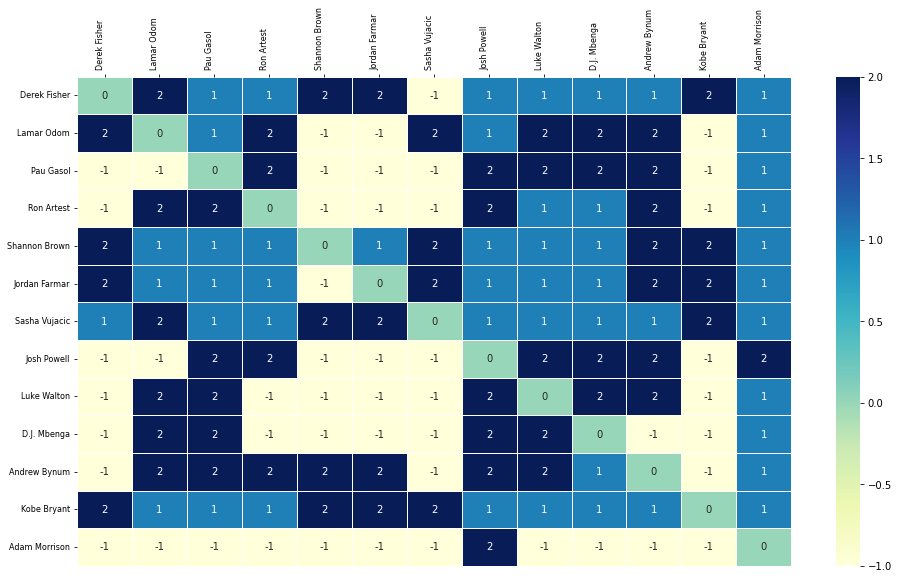

In [51]:
ranking_to_heatmap(teams[TEAM_INDEX].safety_comparaision(session, [ranking_borda_pareto_no_time, 
                                                ranking_ks_cp_pareto_no_time, 
                                                ranking_copeland_cp_pareto_no_time, 
                                                ranking_equiv_cycles_cp_pareto_no_time,
                                                ranking_l5_star_pareto_no_time, 
                                                ranking_stv_pareto_no_time]),TEAM_PLAYERS)

### Average number of comparisions with safety

In [52]:
data = average_number_comp(session, "pareto_dominance", time_criterion= False, fallback=None)

100%|███████████████████████████████████████████| 30/30 [02:51<00:00,  5.71s/it]


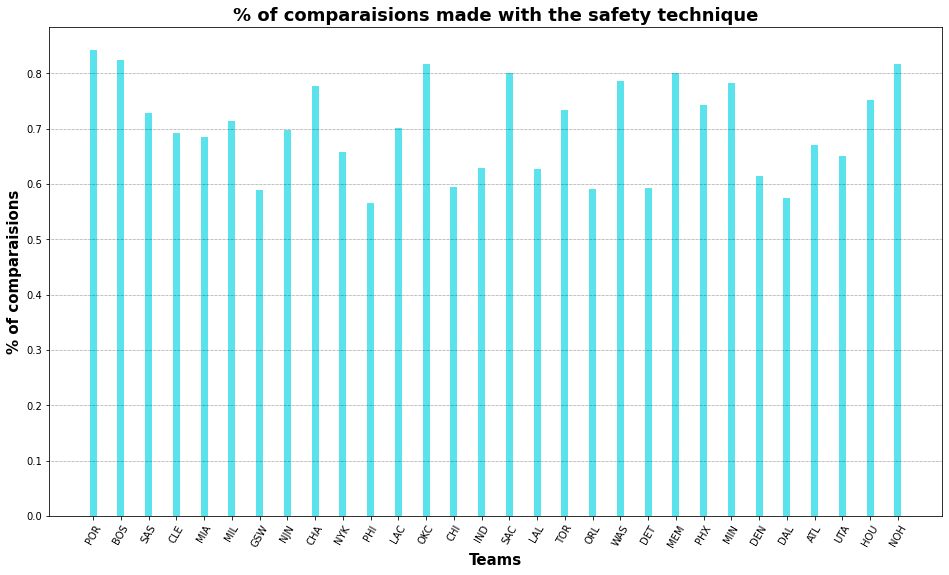

In [53]:
bar_width = 0.25
br1 = np.arange(len(teams))
plt.bar(br1, data ,color ='#42DFEBDD', width = bar_width, edgecolor ='#00000000')
plt.title("% of comparaisions made with the safety technique", fontweight ='bold', fontsize = 18)
plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('% of comparaisions', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(teams))],[t.team_name for t in teams], rotation = 60)
plt.grid(color='#11111155', linestyle=':', linewidth=.5, axis = "y")
plt.show()

<hr/>
<div style='text-align:center; font-weight:bold;'>Average number of comparaisions using safety : 70.28%</div>
<hr/>    

<div style='text-align:center; font-weight:bold;'>Std of comparaisions using safety : 0.083</div>
<hr/>   

### Accuracy of safety approach

In [54]:
df = measure_safety_accuracy(session , "pareto_dominance", False, None)

100%|███████████████████████████████████████████| 30/30 [02:49<00:00,  5.66s/it]


In [55]:
make_pretty_df(pd.DataFrame(df)).format('{:.2f}')

### Average distance between each ranking  

### Average distance between each ranking  

In [104]:
tau, ro = distance_matrix(session, teams, "pareto_dominance")

100%|███████████████████████████████████████████| 30/30 [06:32<00:00, 13.09s/it]


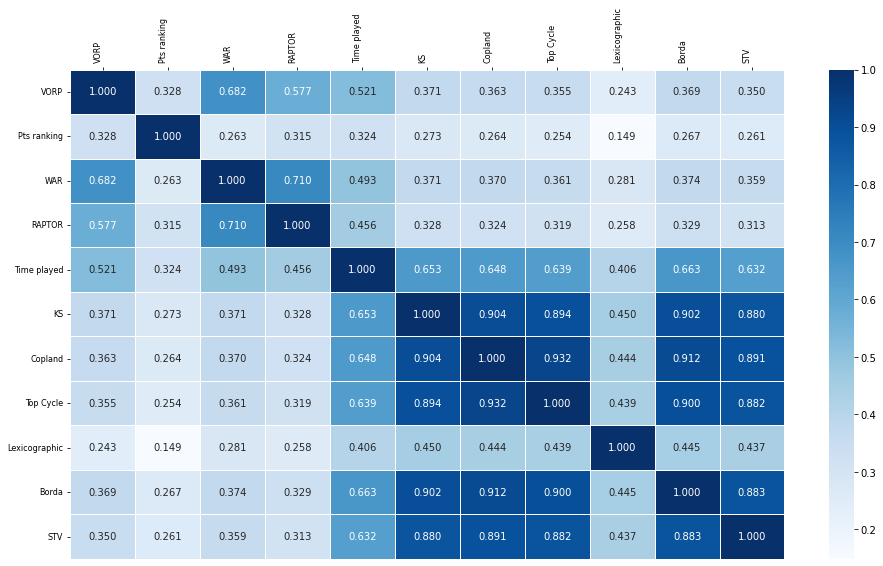

In [105]:
g = sns.heatmap(tau,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

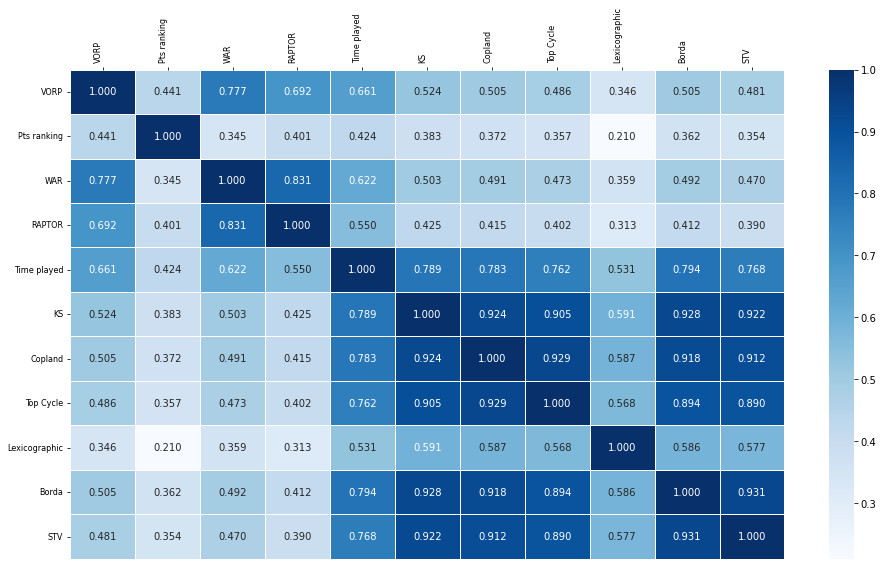

In [106]:
g = sns.heatmap(ro,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

### with Time criteria 

#### Using CP majority

In [59]:
ranking_ks_cp_pareto_time = teams[TEAM_INDEX].krammer_simpson(session,Player.ceteris_paribus, "pareto_dominance", penality=True, time_criterion = True, show_heatmap= False)
df_ks_cp_pareto_time = ranking_to_df(ranking_ks_cp_pareto_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 18.46it/s]


In [60]:
ranking_copeland_cp_pareto_time = teams[TEAM_INDEX].copeland(session, Player.ceteris_paribus,"pareto_dominance", penality=True, time_criterion = True, show_heatmap=False)
df_copeland_cp_pareto_time = ranking_to_df(ranking_copeland_cp_pareto_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 14.23it/s]


In [61]:
ranking_equiv_cycles_cp_pareto_time = teams[TEAM_INDEX].connected_components_equiv(session, Player.ceteris_paribus,"pareto_dominance", penality=True, time_criterion=True, show_heatmap=False)
df_equiv_cycles_cp_pareto_time = ranking_to_df(ranking_equiv_cycles_cp_pareto_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 16.56it/s]


#### Using lexicographic majority

In [62]:
ranking_l5_star_pareto_time = teams[TEAM_INDEX].rank_players(session, Player.l5_star, "pareto_dominance", time_criterion = True, show_heatmap=False)
df_l5_star_pareto_time = ranking_to_df(ranking_l5_star_pareto_time, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 36.18it/s]


#### Scoring approaches

In [63]:
ranking_borda_pareto_time = teams[TEAM_INDEX].borda_ranking(session, "pareto_dominance",time_criterion=True)
df_borda_pareto_time = ranking_to_df(ranking_borda_pareto_time, TEAM_PLAYERS)

In [64]:
ranking_stv_pareto_time = teams[TEAM_INDEX].stv_based_ranking(session, "pareto_dominance", time_criterion= True,fallback = None )
df_stv_pareto_time = ranking_to_df(ranking_stv_pareto_time, TEAM_PLAYERS)

### Summary

In [65]:
df = pd.concat([df_ks_cp_pareto_time, 
                df_copeland_cp_pareto_time,
                df_equiv_cycles_cp_pareto_time,
                df_l5_star_pareto_time,
                df_borda_pareto_time,
                df_stv_pareto_time,
                df_VORP, df_pts,df_war, df_raptor,  df_time], axis=1)
df.columns = ["KS_cp", "Copland_cp","cycle => equiv_cp",
              "LP*","Borda", "STV" ,"VORP ranking","Point ranking", 
              "WAR ranking", "Raptor ranking","Time played"]
df_summary_pareto_time = df.fillna("/")
make_pretty_df(df_summary_pareto_time)

### Critical cases

In [66]:
make_pretty_df(teams[TEAM_INDEX].critical_cases(session,ranking_to_ballot(VORP_ranking, base_nba), "pareto_dominance", time_criterion = True,fallback = None))

### Pairwise comparisions with safety

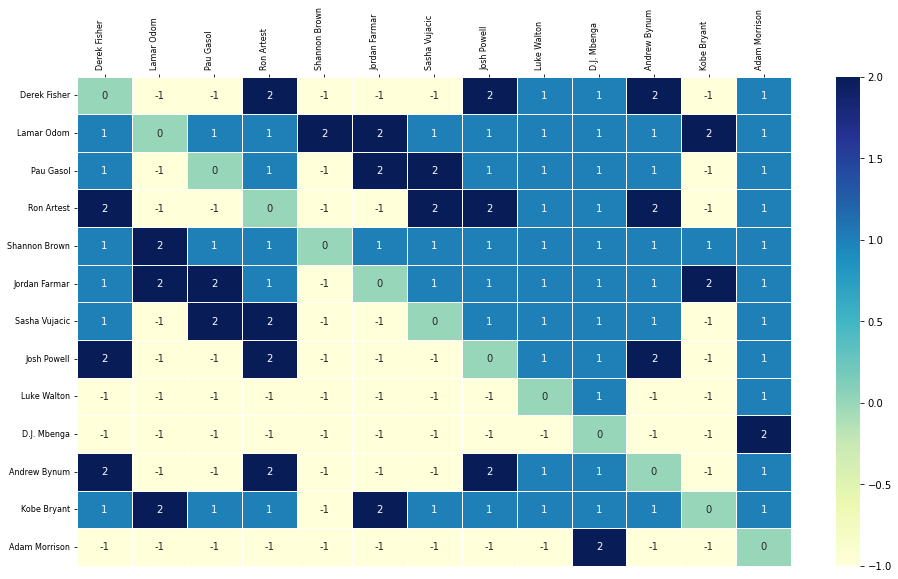

In [67]:
ranking_to_heatmap(teams[TEAM_INDEX].safety_comparaision(session, [ranking_borda_pareto_time, 
                                                ranking_ks_cp_pareto_time, 
                                                ranking_copeland_cp_pareto_time, 
                                                ranking_equiv_cycles_cp_pareto_time,
                                                ranking_l5_star_pareto_time, 
                                                ranking_stv_pareto_time]),TEAM_PLAYERS)

### Average number of comparisions with safety

In [68]:
data = average_number_comp(session, "pareto_dominance", time_criterion= True, fallback=None)

100%|███████████████████████████████████████████| 30/30 [02:46<00:00,  5.56s/it]


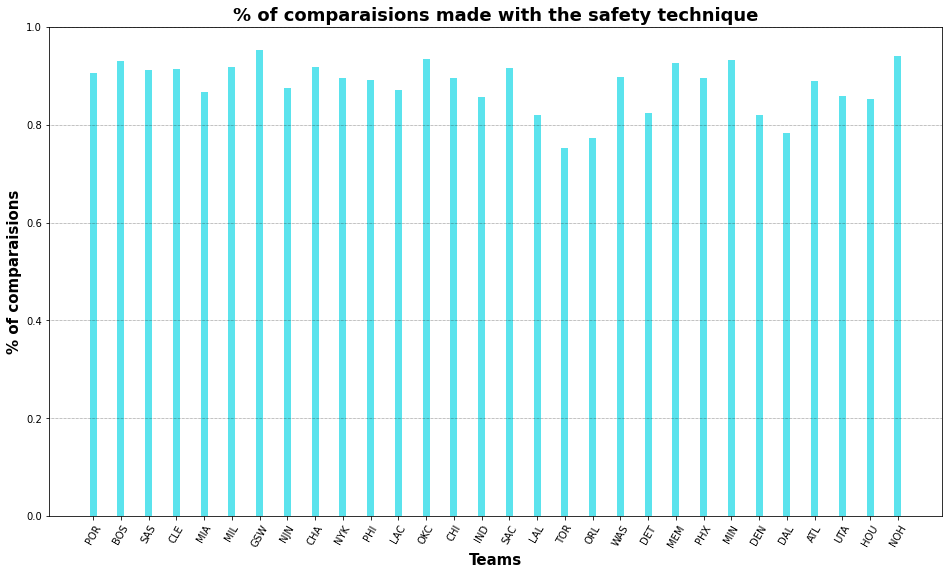

In [69]:
bar_width = 0.25
br1 = np.arange(len(teams))
plt.bar(br1, data ,color ='#42DFEBDD', width = bar_width, edgecolor ='#00000000')
plt.title("% of comparaisions made with the safety technique", fontweight ='bold', fontsize = 18)
plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('% of comparaisions', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(teams))],[t.team_name for t in teams], rotation = 60)
plt.grid(color='#11111155', linestyle=':', linewidth=.5, axis = "y")
plt.show()

<hr/>
<div style='text-align:center; font-weight:bold;'>Average number of comparaisions using safety :88.08%</div>
<hr/>    

<div style='text-align:center; font-weight:bold;'>Std of comparaisions using safety : 0.051</div>
<hr/>   

### Accuracy of safety approach

In [70]:
df = measure_safety_accuracy(session , "pareto_dominance", time_criterion=True, fallback=None)

100%|███████████████████████████████████████████| 30/30 [02:52<00:00,  5.76s/it]


In [71]:
make_pretty_df(pd.DataFrame(df)).format('{:.2f}')

### Average distance between each ranking  

In [119]:
tau, ro = distance_matrix(session, teams, "pareto_dominance", time_criterion = True)

100%|███████████████████████████████████████████| 30/30 [06:48<00:00, 13.61s/it]


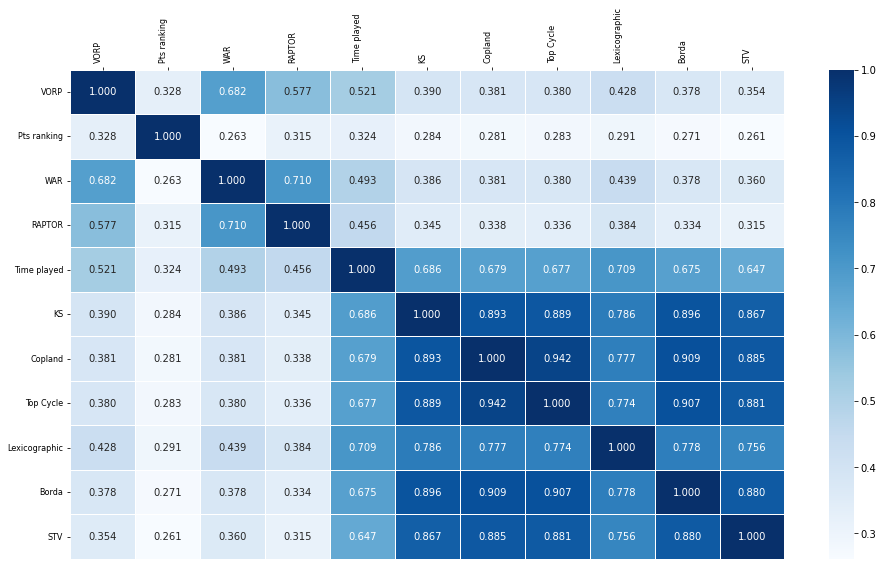

In [120]:
g = sns.heatmap(tau,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

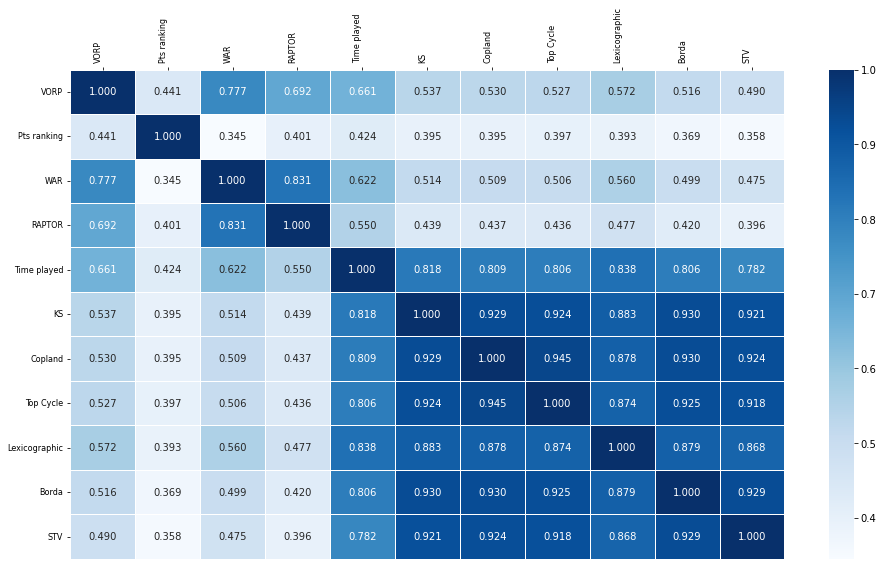

In [121]:
g = sns.heatmap(ro,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

## Rankings of the players using the witness lineups approach

##### Using CP majority

In [75]:
ranking_ks_cp_witness = teams[TEAM_INDEX].krammer_simpson(session,Player.ceteris_paribus,  "witness", penality=True, show_heatmap = False, fallback ="scoring")
df_ks_cp_witness = ranking_to_df(ranking_ks_cp_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00, 12.31it/s]


In [76]:
ranking_copeland_cp_witness = teams[TEAM_INDEX].copeland(session,Player.ceteris_paribus, "witness", penality=True, show_heatmap = False,fallback ="scoring")
df_copeland_cp_witness = ranking_to_df(ranking_copeland_cp_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00, 10.04it/s]


In [77]:
ranking_equiv_cycles_cp_witness = teams[TEAM_INDEX].connected_components_equiv(session,Player.ceteris_paribus, "witness", penality=True, show_heatmap = False,fallback ="scoring")
df_equiv_cycles_cp_witness = ranking_to_df(ranking_equiv_cycles_cp_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00, 12.08it/s]


#### Using lexicographic majority

In [78]:
ranking_l5_star_witness = teams[TEAM_INDEX].rank_players(session, Player.l5_star, "witness", show_heatmap = False,fallback ="scoring")
df_l5_star_witness = ranking_to_df(ranking_l5_star_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 32.88it/s]


#### Scoring approaches

In [79]:
ranking_borda_witness = teams[TEAM_INDEX].borda_ranking(session, "witness",fallback ="scoring")
df_borda_witnes = ranking_to_df(ranking_borda_witness, TEAM_PLAYERS)

In [80]:
ranking_stv_witness = teams[TEAM_INDEX].stv_based_ranking(session, "witness", False, "scoring")
df_stv_witness = ranking_to_df(ranking_stv_witness, TEAM_PLAYERS)

### Summary

In [81]:
df = pd.concat([df_ks_cp_witness, 
                df_copeland_cp_witness,
                df_equiv_cycles_cp_witness,
                df_l5_star_witness,
                df_borda_witnes,
                df_stv_witness,
                df_VORP, df_pts,df_war, df_raptor,  df_time
                ], axis=1)
df.columns = ["KS_cp", "Copland_cp","cycle => equiv_cp" ,
              "LP*", "Borda","STV","VORP ranking", "Points ranking",
              "WAR ranking","RAPTOR ranking","Time played"]
df = df.fillna("/")
make_pretty_df(df)

### Critical cases

In [82]:
make_pretty_df(teams[TEAM_INDEX].critical_cases(session, ranking_to_ballot(VORP_ranking, base_nba),"witness", False, fallback = "scoring"))

### Pairwise comparisions with safety

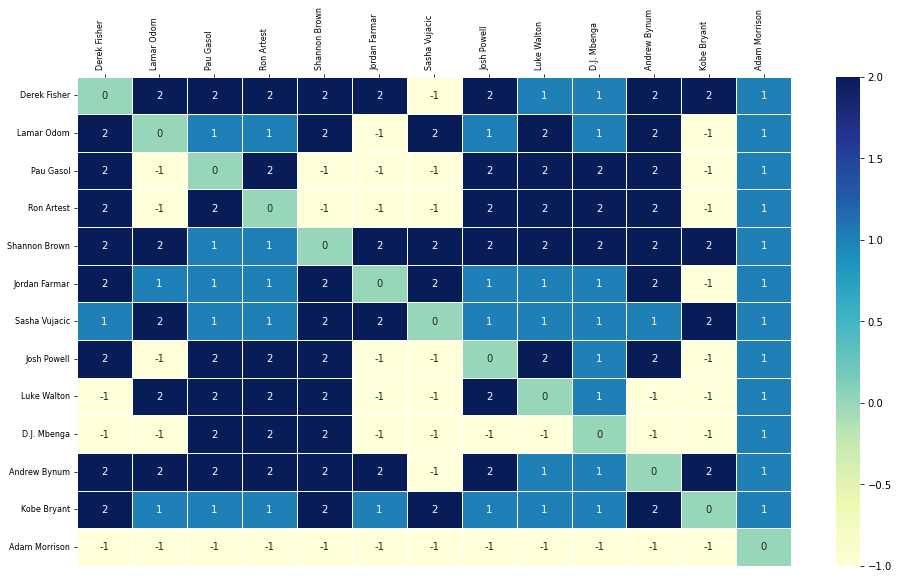

In [83]:
ranking_to_heatmap(teams[TEAM_INDEX].safety_comparaision(session, [ranking_borda_witness, 
                                                ranking_ks_cp_witness, 
                                                ranking_copeland_cp_witness, 
                                                ranking_equiv_cycles_cp_witness,
                                                ranking_l5_star_witness, 
                                                ranking_stv_witness]),TEAM_PLAYERS)

### Average number of comparisions with safety

In [84]:
data = average_number_comp(session, "witness", time_criterion= False, fallback="scoring")

100%|███████████████████████████████████████████| 30/30 [03:43<00:00,  7.46s/it]


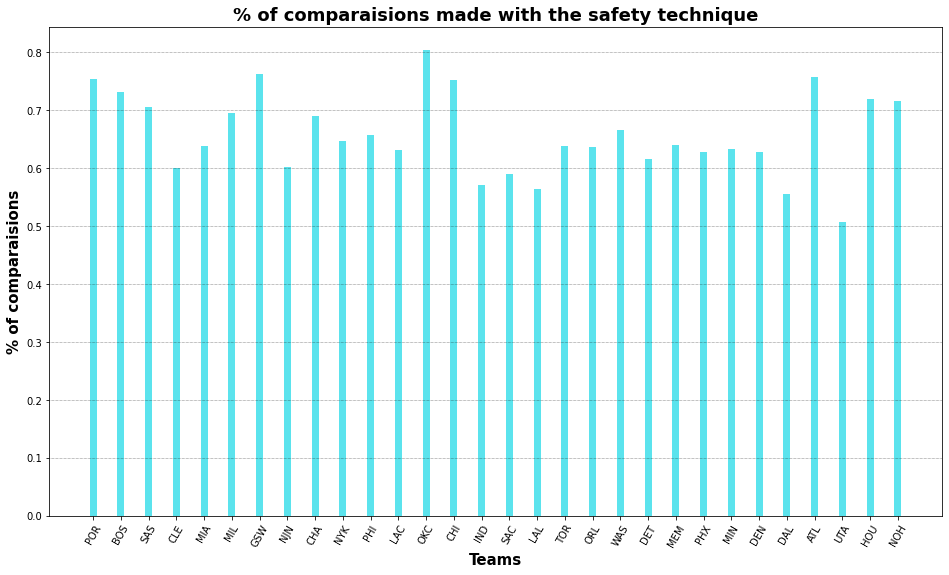

In [85]:
bar_width = 0.25
br1 = np.arange(len(teams))
plt.bar(br1, data ,color ='#42DFEBDD', width = bar_width, edgecolor ='#00000000')
plt.title("% of comparaisions made with the safety technique", fontweight ='bold', fontsize = 18)
plt.xlabel('Teams', fontweight ='bold', fontsize = 15)
plt.ylabel('% of comparaisions', fontweight ='bold', fontsize = 15)
plt.xticks([r for r in range(len(teams))],[t.team_name for t in teams], rotation = 60)
plt.grid(color='#11111155', linestyle=':', linewidth=.5, axis = "y")
plt.show()

<hr/>
<div style='text-align:center; font-weight:bold;'>Average number of comparaisions using safety : 66.23%</div>
<hr/>    

<div style='text-align:center; font-weight:bold;'>Std of comparaisions using safety : 0.072</div>
<hr/>   

### Accuracy of safety approach

In [86]:
df = measure_safety_accuracy(session , "witness", False, "scoring")

100%|███████████████████████████████████████████| 30/30 [03:31<00:00,  7.06s/it]


In [87]:
make_pretty_df(pd.DataFrame(df)).format('{:.2f}')

### Average distance between each ranking  

In [110]:
tau, ro = distance_matrix(session, teams, "witness", time_criterion=False, fallback="scoring")

100%|███████████████████████████████████████████| 30/30 [07:16<00:00, 14.55s/it]


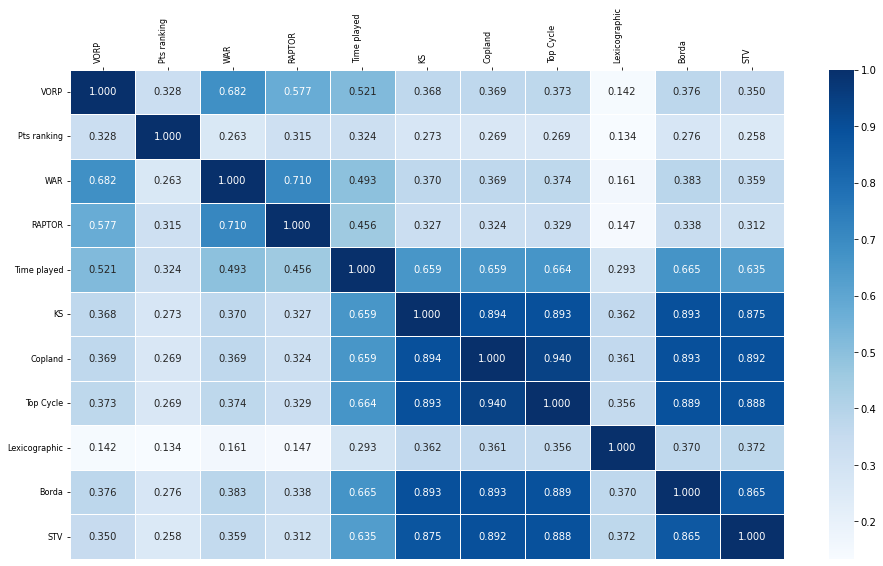

In [111]:
g = sns.heatmap(tau,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

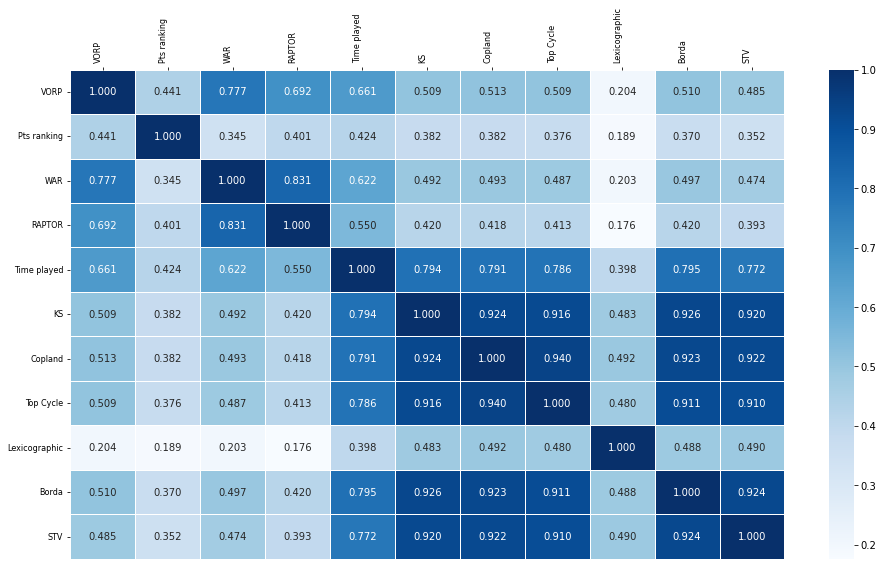

In [114]:
g = sns.heatmap(ro,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

### Witness with Bradley Terry

In [5]:
ranking_ks_cp_witness = teams[TEAM_INDEX].krammer_simpson(session,Player.ceteris_paribus,  "witness", penality=True, show_heatmap = False, fallback ="scoring", bradley_terry = True)
df_ks_cp_witness = ranking_to_df(ranking_ks_cp_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4630.73it/s]


8.558707792747619


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4495.71it/s]


3.1886822564831654


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4367.07it/s]


1.8888998679504685


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4663.08it/s]


1.3190921943119407


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4803.39it/s]


1.0142096629764112


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4847.04it/s]


0.8217842261712132


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4513.98it/s]


0.6903762840980368


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4382.20it/s]


0.596358308885497


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4482.02it/s]


0.5270168718797188


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4464.66it/s]


0.4716689750866707


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4880.54it/s]


0.42514633820843545


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4673.13it/s]


0.3842615885445908


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4596.35it/s]


0.34942036235913654


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4593.42it/s]


0.31902048305216274


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4911.21it/s]


0.29230322793811425


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4577.16it/s]


0.26918570627621163


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4054.20it/s]


0.24847473557504707


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4157.96it/s]


0.2297968902609051


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4816.80it/s]


0.21293498543058068


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4614.56it/s]


0.19769507902364475


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5009.84it/s]


0.1839040140093095


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4722.73it/s]


0.17140735599323745


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4539.96it/s]


0.16006755052608512


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4474.89it/s]


0.14976222930666278


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4793.51it/s]


0.14038264134792425


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4854.26it/s]


0.1318322036490507


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4529.37it/s]


0.12402517121847509


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4033.68it/s]


0.11688542606318522


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4606.10it/s]


0.1103453826836764


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4491.39it/s]


0.10434500534786277


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4530.58it/s]


0.09883093060634711


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4745.36it/s]


0.09375568732190179


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4742.25it/s]


0.08907700587640975


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5068.18it/s]


0.08475720807341999


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4533.83it/s]


0.08076266944704848


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4908.52it/s]


0.07706334610596147


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4671.51it/s]


0.07363235879469589


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4981.88it/s]


0.07045935726586852


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4707.46it/s]


0.06752794832013376


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4719.80it/s]


0.06479734483440641


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4645.43it/s]


0.062250281209728184


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4842.44it/s]


0.059871205064253766


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4546.37it/s]


0.05767663022528975


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4162.16it/s]


0.05562625894221881


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4788.26it/s]


0.05372864418621817


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4688.23it/s]


0.05194629659795668


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5123.25it/s]


0.050270118129159505


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4742.43it/s]


0.0487572720338094


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4818.00it/s]


0.04750893684686401


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4964.28it/s]


0.04633034899077923


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5028.73it/s]


0.04521629005427584


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4648.20it/s]


0.04416199061784476


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4535.47it/s]


0.043163086760968875


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4673.05it/s]


0.04221558124372454


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4865.49it/s]


0.041315808817151446


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4395.12it/s]


0.04046040518436698


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4883.63it/s]


0.0396462791933935


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4669.99it/s]


0.038870587893956185


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4758.13it/s]


0.03813071413535894


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4363.23it/s]


0.03742424642150918


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4772.12it/s]


0.03674896077336805


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4560.10it/s]


0.03610280437874892


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4972.32it/s]


0.03548388083548143


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5057.89it/s]


0.034890436816707934


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4658.43it/s]


0.034320850006960474


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4644.15it/s]


0.03377361817518043


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4782.60it/s]


0.033247349266095


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5159.18it/s]


0.03274075240486826


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4903.39it/s]


0.03225262972170492


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5197.16it/s]


0.03178186891350303


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5066.50it/s]


0.03132743646880674


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4764.79it/s]


0.030888371490353055


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5121.93it/s]


0.030463780056657667


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5152.12it/s]


0.03005283007034703


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5122.17it/s]


0.02965474654650764


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4803.49it/s]


0.0292688072992769


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4972.31it/s]


0.028894338989213317


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4455.87it/s]


0.028530713497900782


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4705.91it/s]


0.028177344599646596


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4915.12it/s]


0.027833684903216936


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4570.89it/s]


0.027499223039237807


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5031.65it/s]


0.027173481071359893


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 3906.65it/s]


0.02685601211139751


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4708.16it/s]


0.02654639812062378


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4292.89it/s]


0.026244247881090664


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4173.97it/s]


0.02594919512242952


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4757.85it/s]


0.025660896790921553


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4200.71it/s]


0.025379031448894945


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4573.27it/s]


0.025103297793624527


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 2663.33it/s]


0.024833413285873886


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 3932.42it/s]


0.024569112879151738


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4077.75it/s]


0.024310147841546764


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4468.90it/s]


0.02405628466272274


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4720.08it/s]


0.023807304039348526


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 2746.25it/s]


0.023562999932773287


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4621.28it/s]


0.023323178693353333


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4473.70it/s]


0.023087658246275827


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4902.27it/s]


0.022856267334180648


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4699.13it/s]


0.022628844812284353


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5026.54it/s]


0.022405238992055113


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4815.97it/s]


0.02218530702982737


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4754.30it/s]


0.0219689143570308


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4626.70it/s]


0.021755934148993544


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4278.67it/s]


0.021546246829507072


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4564.03it/s]


0.021339739608573945


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4133.60it/s]


0.02113630605096896


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4518.10it/s]


0.020935845673417296


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4962.13it/s]


0.020738263568374223


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4370.10it/s]


0.020543470052540286


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4697.79it/s]


0.020351380338393905


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4614.99it/s]


0.02016191422714522


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4481.85it/s]


0.01997499582164696


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4366.95it/s]


0.019790553257891082


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4699.67it/s]


0.01960851845383722


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4221.26it/s]


0.01942882687440206


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4789.63it/s]


0.019251417311522478


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4678.76it/s]


0.019076231678289663


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4904.46it/s]


0.01890321481621846


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4736.72it/s]


0.01873231431478768


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4760.59it/s]


0.018563480342437513


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4478.43it/s]


0.01839666548828397


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4742.08it/s]


0.018231824613842422


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4798.30it/s]


0.018068914714119068


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4707.50it/s]


0.017907894787459033


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4745.52it/s]


0.01774872571359073


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5012.65it/s]


0.017591370139337332


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4798.84it/s]


0.017435792371511497


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4500.34it/s]


0.017281958276526687


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4913.04it/s]


0.017129835186305765


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4487.12it/s]


0.0169793918100836


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4851.83it/s]


0.01683059815173399


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4497.90it/s]


0.016683425432268358


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4774.33it/s]


0.016537846017188468


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4051.56it/s]


0.016393833348377206


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4504.01it/s]


0.0162513618802567


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4778.99it/s]


0.01611040701993312


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4949.83it/s]


0.015970945071091636


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4905.65it/s]


0.015832953181396842


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4960.50it/s]


0.015696409293189256


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4806.64it/s]


0.015561292097267155


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4690.18it/s]


0.015427580989563957


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4700.64it/s]


0.015295256030541132


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5330.24it/s]


0.01516429790712788


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5026.39it/s]


0.015034687897051646


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4934.76it/s]


0.0149064078354055


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4835.16it/s]


0.014779440083321462


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4880.11it/s]


0.014653767498613376


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4565.18it/s]


0.014529373408268344


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4426.92it/s]


0.014406241582675103


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4858.42it/s]


0.014284356211476543


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4426.55it/s]


0.014163701880950341


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4612.46it/s]


0.014044263552819292


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4877.05it/s]


0.013926026544404465


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4935.13it/s]


0.013808976510037629


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4752.46it/s]


0.013693099423651102


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4927.06it/s]


0.01357838156247895


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4282.99it/s]


0.013464809491790616


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4288.15it/s]


0.013352370050600991


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4706.99it/s]


0.013241050338289862


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4318.79it/s]


0.013130837702077375


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4714.71it/s]


0.013021719725299016


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4447.48it/s]


0.012913684216432467


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4624.90it/s]


0.01280671919882561


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5031.42it/s]


0.0127008129010849


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4398.98it/s]


0.012595953748079425


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4372.89it/s]


0.01249213035252256


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4451.84it/s]


0.012389331507096656


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4450.28it/s]


0.012287546177078926


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4578.96it/s]


0.012186763493448112


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4505.21it/s]


0.012086972746428434


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4518.31it/s]


0.011988163379452483


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4690.86it/s]


0.011890324983508779


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4758.44it/s]


0.011793447291856458


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4771.48it/s]


0.011697520175075093


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4699.90it/s]


0.011602533636433203


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4561.90it/s]


0.011508477807555002


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4481.30it/s]


0.0114153429443611


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4282.56it/s]


0.01132311942326677


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4902.45it/s]


0.011231797737629107


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4842.97it/s]


0.011141368494408128


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4764.20it/s]


0.011051822411048247


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4629.11it/s]


0.010963150312550045


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4416.09it/s]


0.010875343128725817


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4407.48it/s]


0.010788391891628304


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 3303.19it/s]


0.010702287733135012


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4562.28it/s]


0.010617021882682029


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4542.39it/s]


0.010532585665134354


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4639.07it/s]


0.010448970498787862


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4340.51it/s]


0.010366167893484475


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4489.42it/s]


0.01028416944884583


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 5183.57it/s]


0.010202966852602639


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4548.26it/s]


0.010122551879025204


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4746.95it/s]


0.010042916387440893


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4693.88it/s]


0.009964052320832119


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4759.07it/s]


0.009885951704516015


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4672.22it/s]


0.00980860664488969


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4540.31it/s]


0.009732009328245016


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4531.18it/s]


0.009656152019641841


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4484.86it/s]


0.009581027061840663


100%|███████████████████████████████████████| 366/366 [00:00<00:00, 4148.50it/s]


0.009506626874282512


100%|███████████████████████████████████████████| 13/13 [00:01<00:00, 11.19it/s]


In [8]:
ranking_copeland_cp_witness = teams[TEAM_INDEX].copeland(session,Player.ceteris_paribus, "witness", penality=True, show_heatmap = False,fallback ="scoring", bradley_terry = True)
df_copeland_cp_witness = ranking_to_df(ranking_copeland_cp_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00,  9.66it/s]


In [9]:
ranking_equiv_cycles_cp_witness = teams[TEAM_INDEX].connected_components_equiv(session,Player.ceteris_paribus, "witness", penality=True, show_heatmap = False,fallback ="scoring", bradley_terry = True)
df_equiv_cycles_cp_witness = ranking_to_df(ranking_equiv_cycles_cp_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:01<00:00, 11.75it/s]


#### Using lexicographic majority

In [10]:
ranking_l5_star_witness = teams[TEAM_INDEX].rank_players(session, Player.l5_star, "witness", show_heatmap = False,fallback ="scoring", bradley_terry = True)
df_l5_star_witness = ranking_to_df(ranking_l5_star_witness, TEAM_PLAYERS)

100%|███████████████████████████████████████████| 13/13 [00:00<00:00, 35.65it/s]


#### Scoring approaches

In [11]:
ranking_borda_witness = teams[TEAM_INDEX].borda_ranking(session, "witness",fallback ="scoring",bradley_terry = True)
df_borda_witnes = ranking_to_df(ranking_borda_witness, TEAM_PLAYERS)

In [12]:
ranking_stv_witness = teams[TEAM_INDEX].stv_based_ranking(session, "witness", False, "scoring",bradley_terry = True)
df_stv_witness = ranking_to_df(ranking_stv_witness, TEAM_PLAYERS)

### Summary

In [13]:
df = pd.concat([df_ks_cp_witness, 
                df_copeland_cp_witness,
                df_equiv_cycles_cp_witness,
                df_l5_star_witness,
                df_borda_witnes,
                df_stv_witness,
                df_VORP, df_pts,df_war, df_raptor,  df_time
                ], axis=1)
df.columns = ["KS_cp", "Copland_cp","cycle => equiv_cp" ,
              "LP*", "Borda","STV","VORP ranking", "Points ranking",
              "WAR ranking","RAPTOR ranking","Time played"]
df = df.fillna("/")
make_pretty_df(df)

### Critical cases

In [13]:
make_pretty_df(teams[TEAM_INDEX].critical_cases(session, ranking_to_ballot(VORP_ranking, base_nba),"witness", False, fallback = "scoring"))

### Average distance between each ranking  

In [5]:
tau, ro = distance_matrix(session, teams, "witness", time_criterion=False, bradley_terry = True)

 62%|█████████████████████████▏               | 192/312 [11:26<03:57,  1.98s/it]


100%|█████████████████████████████████████████| 312/312 [13:19<00:00,  2.56s/it]

100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5784.84it/s]


7.16439705721969



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5610.56it/s]


2.9162607855317995



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5837.87it/s]


1.7949162145337245



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5489.17it/s]


1.262552843121354



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5766.20it/s]


0.9714375034292225



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5826.56it/s]


0.7808006434496899



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5435.97it/s]


0.6460764113353938



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5830.87it/s]


0.5462197424267901



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5510.34it/s]


0.46896299511166983



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5558.93it/s]


0.4096599888560301



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5429.70it/s]


0.3630198316411243



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5674.29it/s]


0.3245196382977946



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5896.11it/s]


0.29244709070006525



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5565.25it/s]


0.26643589595371975



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5786.55it/s]


0.24567141608545595



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5705.44it/s]


0.22808561236547067



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5741.89it/s]


0.21271480661274392



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5847.71it/s]


0.19934934077364455



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5555.46it/s]


0.18752927654450158



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5816.85it/s]


0.17696417780479817



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5455.30it/s]


0.16742530493270036



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5736.38it/s]


0.158770790406763



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5823.24it/s]


0.1508831769588342



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5494.63it/s]


0.143664534878701



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 2916.77it/s]


0.13703267627109886



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5803.67it/s]


0.1309181950463555



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5688.53it/s]


0.12526213422045016



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5887.38it/s]


0.12001413388637333



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5405.99it/s]


0.11513095047403576



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5638.65it/s]


0.11057526499343764



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5881.82it/s]


0.106314717822554



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5764.40it/s]


0.10232112230638835



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5685.81it/s]


0.09856982040784917



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5678.55it/s]


0.09503915190514647



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5521.50it/s]


0.09171001488419919



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5419.33it/s]


0.0885748788515846



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5687.91it/s]


0.08564170794035826



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5527.26it/s]


0.08286252155644241



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5761.69it/s]


0.08022544302398821



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5736.91it/s]


0.07771982299102861



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5882.53it/s]


0.07533608362493886



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5629.94it/s]


0.07306558570282022



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5386.21it/s]


0.07090051483132193



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5414.85it/s]


0.06883378371079546



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5766.66it/s]


0.06685894790566893



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 4923.54it/s]


0.06497013302441136



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5824.93it/s]


0.06316197157063275



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5183.01it/s]


0.06142954801841098



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5789.09it/s]


0.059768350903392053



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5847.89it/s]


0.05817423091692198



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5936.74it/s]


0.05664336415168473



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5413.28it/s]


0.05517221978064237



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5582.89it/s]


0.053757531561692454



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5751.88it/s]


0.05239627265248424



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5668.52it/s]


0.05108563329677708



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5666.51it/s]


0.049823001008045285



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5821.41it/s]


0.048605942930216195



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5540.86it/s]


0.04743219010092762



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5865.03it/s]


0.04629962338125772



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5410.19it/s]


0.0452619142350271



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5910.46it/s]


0.044265644097568696



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5230.64it/s]


0.043301934421862656



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5356.45it/s]


0.042369313669774776



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5797.40it/s]


0.04146639894551804



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5315.43it/s]


0.04059188912321968



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5621.62it/s]


0.03974455862801226



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5824.51it/s]


0.038923251798159884



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5784.66it/s]


0.03812687776471065



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5542.78it/s]


0.03737551341834648



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5545.86it/s]


0.036657076973611084



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5748.55it/s]


0.035959388828165406



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5527.10it/s]


0.03528469928767709



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5729.12it/s]


0.03464878252676871



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5462.84it/s]


0.03403039759197553



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5316.95it/s]


0.03342888234408346



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5669.99it/s]


0.03284360751903599



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5598.12it/s]


0.03227397462901404



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5531.89it/s]


0.0317194140302518



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 4789.00it/s]


0.03117938314188058



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5179.14it/s]


0.030653364801670524



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5718.76it/s]


0.030140865746170382



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5729.50it/s]


0.029641415203918442



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5480.13it/s]


0.02915456359171585



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5637.94it/s]


0.028679881304851294



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5492.00it/s]


0.028216957593193176



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5225.71it/s]


0.027765399515785265



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5923.33it/s]


0.02732483096738211



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5608.58it/s]


0.026894891770934473



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5569.77it/s]


0.026475236830664085



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5854.25it/s]


0.026065535340832023



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5758.69it/s]


0.025665470045812003



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5305.41it/s]


0.025274736547413117



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5767.53it/s]


0.02489304265585742



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5522.69it/s]


0.024520107781057978



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5523.08it/s]


0.024155662361201174



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5652.07it/s]


0.023799447325858623



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5846.69it/s]


0.023451213591128468



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5827.99it/s]


0.023110721584483622



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5625.82it/s]


0.022777740797244546



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5759.20it/s]


0.022452049362721334



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5361.49it/s]


0.022133433658259274



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5775.52it/s]


0.02182168792957425



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5083.23it/s]


0.021516613935851046



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5898.58it/s]


0.021218020614244854



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5764.45it/s]


0.020925723762515405



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5548.80it/s]


0.020639545738607268



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5861.80it/s]


0.02035931517609709



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5538.86it/s]


0.020084866714513972



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5491.38it/s]


0.019816040743594297



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5415.43it/s]


0.0195526831606133



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5554.76it/s]


0.01929464514000108



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5840.19it/s]


0.019041782914499584



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5304.73it/s]


0.018793957567174085



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5600.04it/s]


0.018551034833633955



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5560.68it/s]


0.018314891754091116



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5582.93it/s]


0.018109168453378968



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5810.60it/s]


0.017907283998334914



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5383.84it/s]


0.01770913954515934



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5404.05it/s]


0.01751463946068694



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5344.66it/s]


0.017323691195511713



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5672.99it/s]


0.01713620516312546



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5749.16it/s]


0.016952094624734723



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5573.73it/s]


0.016771275579416326



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5513.38it/s]


0.01659366665935568



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5344.87it/s]


0.016419189029858543



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5543.46it/s]


0.01624776629389207



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5536.59it/s]


0.01607932440090728



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5491.19it/s]


0.01591379155972892



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5712.39it/s]


0.015751098155277185



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5733.99it/s]


0.015591176668946282



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5637.82it/s]


0.015433961602426242



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5606.21it/s]


0.015279389404823845



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5848.67it/s]


0.015127398402878182



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5711.17it/s]


0.014977928734146377



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5468.09it/s]


0.014830922283002188



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5641.27it/s]


0.014686322619295034



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5769.84it/s]


0.014544074939563435



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5508.97it/s]


0.014404126010662936



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5564.70it/s]


0.014266424115692409



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5704.77it/s]


0.014130919002122346



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5659.69it/s]


0.013997561831997567



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 6025.36it/s]


0.013866305134151094



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5790.24it/s]


0.013737102758290928



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5670.48it/s]


0.013609909830926583



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5838.23it/s]


0.013484682712992049



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5544.24it/s]


0.01336137895914517



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5490.92it/s]


0.013239957278623902



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5632.70it/s]


0.013120377497610976



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5823.92it/s]


0.013002600523035701



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5677.54it/s]


0.012886588307751419



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5769.76it/s]


0.012772303817025094



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5597.91it/s]


0.012659710996272073



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5727.54it/s]


0.01254877474001118



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5384.75it/s]


0.012439460861951721



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5381.45it/s]


0.012331736066193637



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5231.39it/s]


0.012225567919472343



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5654.19it/s]


0.012120924824415144



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5397.16it/s]


0.012017775993771978



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5623.33it/s]


0.011916091425560056



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5349.90it/s]


0.011815841879107905



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 4206.84it/s]


0.011716998851941472



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5575.80it/s]


0.011619534557504672



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5585.44it/s]


0.011523421903632834



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5586.01it/s]


0.01142863447181535



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5547.79it/s]


0.011335146497149026



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5702.18it/s]


0.011242932849005861



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5645.34it/s]


0.01115196901235247



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5589.56it/s]


0.01106223106971415



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5589.73it/s]


0.010973695683761737



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 4941.26it/s]


0.01088634008046723



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5416.55it/s]


0.010800142032851807



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5861.22it/s]


0.010715079845259884



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5320.71it/s]


0.010631132338169338



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5667.76it/s]


0.01054827883350276



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5724.13it/s]


0.01046649914041435



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5418.06it/s]


0.010385773541571039



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5539.21it/s]


0.010306082779845651



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5258.17it/s]


0.01022740804547521



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5589.16it/s]


0.010149730963618701



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5181.99it/s]


0.010073033582318423



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5858.65it/s]


0.009997298360852117



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5670.85it/s]


0.00992250815845519



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5522.31it/s]


0.009848646223397796



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5635.42it/s]


0.009775696182413763



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5653.38it/s]


0.009703642030460584



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5482.06it/s]


0.009632468120797355



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5663.66it/s]


0.009562159155377767



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5699.58it/s]


0.009492700175539168



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5980.31it/s]


0.00942407655297503



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5376.41it/s]


0.009356273980998997



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5682.01it/s]


0.009289278466060633



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5925.82it/s]


0.009223076319532333



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5375.02it/s]


0.009157654149741712



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5755.33it/s]


0.009092998854238706



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5659.42it/s]


0.009029097612316201



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5715.43it/s]


0.008965937877724657



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5655.02it/s]


0.008903507371633552



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5919.52it/s]


0.008841794075785163



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5842.56it/s]


0.008780786225854827



100%|███████████████████████████████████████| 312/312 [00:00<00:00, 5539.82it/s]


0.008720472305014638


 41%|████████████████▋                        | 192/470 [19:56<20:34,  4.44s/it]


 82%|█████████████████████████████████▋       | 386/470 [29:07<01:53,  1.35s/it]


100%|█████████████████████████████████████████| 470/470 [30:02<00:00,  3.84s/it]

100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3744.32it/s]


9.261100785848104



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3262.23it/s]


3.2871722765365443



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3806.65it/s]


2.0391548684085246



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3683.81it/s]


1.4891505768905533



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3553.73it/s]


1.16230321596431



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3661.80it/s]


0.940013312954322



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3692.71it/s]


0.78477328342498



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3706.55it/s]


0.6661187730055506



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3757.23it/s]


0.5731928915488236



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3462.10it/s]


0.4989785882229948



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3788.03it/s]


0.43902920973587506



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3602.11it/s]


0.3901463349900356



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3514.04it/s]


0.3499041635352607



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3663.90it/s]


0.31632656461779923



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3668.09it/s]


0.28748988607651604



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3679.86it/s]


0.26285502696970775



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3784.57it/s]


0.24156990938538436



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3720.03it/s]


0.22313833538670158



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3701.96it/s]


0.2069861917024718



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3597.31it/s]


0.19264290865782063



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3763.20it/s]


0.17991349504403834



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3921.79it/s]


0.16861136706579194



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3855.42it/s]


0.15870786477773183



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3609.67it/s]


0.1498031986238207



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3762.96it/s]


0.14199587531815178



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3869.75it/s]


0.13491751750278183



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3758.55it/s]


0.12843808206397955



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3558.42it/s]


0.12249296608362369



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3737.57it/s]


0.11702183269435616



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3674.28it/s]


0.11197199170687064



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3727.43it/s]


0.10738482330042184



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3174.12it/s]


0.10319575036972284



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3940.81it/s]


0.09932576783640436



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3746.85it/s]


0.09575632470502887



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3774.49it/s]


0.0924926419771547



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3740.96it/s]


0.08949032455808514



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3741.30it/s]


0.08678687355572998



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3667.44it/s]


0.08429800164443531



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3816.80it/s]


0.08195157458072042



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3728.65it/s]


0.07973539523276713



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3605.54it/s]


0.07765105185121904



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3693.01it/s]


0.07568594105578641



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3807.41it/s]


0.07382096353084273



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3011.54it/s]


0.07204823596626053



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3771.84it/s]


0.07036065317803558



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3743.31it/s]


0.06875179905025815



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3818.65it/s]


0.06721586901225912



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3666.96it/s]


0.06574760238047596



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3533.15it/s]


0.06434222316198226



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3808.71it/s]


0.06299538813723904



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3750.14it/s]


0.06170314122242923



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3632.68it/s]


0.06046187326348745



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3706.60it/s]


0.059268286540561856



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3661.92it/s]


0.05811936336760944



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3928.28it/s]


0.057012338260597796



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3523.47it/s]


0.05594467322269253



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3387.98it/s]


0.05491403575791744



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3740.64it/s]


0.05391827927830255



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3728.74it/s]


0.05295542561489368



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3813.30it/s]


0.05202364938175577



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3820.33it/s]


0.0511212639749945



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3772.83it/s]


0.05024670901720498



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3803.25it/s]


0.049398539081879474



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3846.78it/s]


0.04857541355324241



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3726.52it/s]


0.04777608749488263



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3845.89it/s]


0.046999403416143226



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3717.60it/s]


0.04624428383861045



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3841.63it/s]


0.045509724576757865



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3787.73it/s]


0.04479478865689924



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3721.46it/s]


0.04410332772142388



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3605.75it/s]


0.04343328382437782



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3727.25it/s]


0.04278015658240458



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3749.04it/s]


0.042143233257006016



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3747.01it/s]


0.041521845331499885



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3591.91it/s]


0.04091536508866943



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3815.20it/s]


0.04032320249018219



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3640.86it/s]


0.03974480232841101



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3590.25it/s]


0.03917964162445894



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3762.15it/s]


0.03862722724890099



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3644.44it/s]


0.038087093744233726



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3815.98it/s]


0.03755880133015042



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3824.25it/s]


0.03704193407471314



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3804.90it/s]


0.03653609821618398



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3806.87it/s]


0.03604092062179104



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3663.22it/s]


0.035556047371121884



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3447.92it/s]


0.035081142452929016



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3569.81it/s]


0.03461588656537921



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3799.20it/s]


0.03415997601057727



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3724.37it/s]


0.03371312167520848



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3704.55it/s]


0.033275048089816524



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3851.86it/s]


0.03284549255998557



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3795.82it/s]


0.03242420436334196



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3732.29it/s]


0.03201094400676667



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3764.47it/s]


0.03160548253884238



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3754.44it/s]


0.031207600912906548



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3727.84it/s]


0.030817089396562695



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3757.71it/s]


0.03043374702385202



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3831.43it/s]


0.030057381086620302



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3825.98it/s]


0.029687806661936093



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3618.55it/s]


0.029324846172670352



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3978.78it/s]


0.028968328978627625



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3508.84it/s]


0.028618090995811966



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3714.26it/s]


0.02827397434163122



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3766.29it/s]


0.027935827004052387



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3778.15it/s]


0.02760350253284936



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 2920.66it/s]


0.027276859751252363



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3581.13it/s]


0.026955762486488257



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3501.15it/s]


0.02664007931775421



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3716.54it/s]


0.02632968334035263



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3532.14it/s]


0.026024451944781757



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3706.36it/s]


0.025724266609686318



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3784.33it/s]


0.025429012707660573



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3849.51it/s]


0.02513857932297753



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3787.33it/s]


0.02485285908038049



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3714.16it/s]


0.024571747984163093



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3835.02it/s]


0.024295145266801217



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3767.28it/s]


0.024022953246479024



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3793.79it/s]


0.023755077192878983



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3589.24it/s]


0.023491425200678505



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3721.37it/s]


0.023231908070219708



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3733.70it/s]


0.022976439194871287



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3848.84it/s]


0.022724934454627935



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3722.22it/s]


0.022477312115536194



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3657.69it/s]


0.022233492734561107



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3838.19it/s]


0.021993399069533237



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3557.67it/s]


0.02175695599385602



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3817.84it/s]


0.021524090415651488



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3764.26it/s]


0.021294731201081232



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3801.70it/s]


0.021068809101559983



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3877.15it/s]


0.020846256684627737



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3644.69it/s]


0.02062700826825478



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3580.64it/s]


0.020410999858363057



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3861.58it/s]


0.02019816908936674



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3784.89it/s]


0.01998845516756057



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3773.79it/s]


0.01978242950490112



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3124.89it/s]


0.01958108076355683



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3196.73it/s]


0.019382615360170666



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3822.26it/s]


0.019186979718558914



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3734.75it/s]


0.018994121553832715



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3898.55it/s]


0.018803989830407



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3596.90it/s]


0.018616534721861623



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3658.04it/s]


0.018431707572552396



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3709.49it/s]


0.018249460860879634



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3724.73it/s]


0.018069748164119742



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3690.10it/s]


0.017892524124733016



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3766.52it/s]


0.0177177444180696



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3685.36it/s]


0.017545365721401873



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3858.16it/s]


0.017375345684208697



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3745.90it/s]


0.017207642899639962



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3753.76it/s]


0.01704221687712193



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3641.30it/s]


0.01687902801601674



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3623.81it/s]


0.01671803758030363



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3826.15it/s]


0.016559207674222115



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3539.40it/s]


0.016402501218829343



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3638.52it/s]


0.016247881929428845



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3649.89it/s]


0.016095314293829155



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3646.61it/s]


0.015944763551384966



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3630.30it/s]


0.015796195672798795



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3718.05it/s]


0.015649577340631132



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3617.44it/s]


0.01550487593049452



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3687.51it/s]


0.015362059492898934



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3637.73it/s]


0.015221096735723645



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3347.07it/s]


0.01508195700727483



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3646.87it/s]


0.014944610279917546



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3706.89it/s]


0.014809027134242713



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3732.34it/s]


0.014675178743764278



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3600.28it/s]


0.014543036860100821



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3549.45it/s]


0.014412573798640785



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3764.37it/s]


0.014283762424660474



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3811.12it/s]


0.01415657613987975



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3721.39it/s]


0.014030988869437136



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3840.29it/s]


0.013906975049261909



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3735.14it/s]


0.013784509613841141



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3750.30it/s]


0.013663567984347385



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3779.85it/s]


0.013544126057130406



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3641.47it/s]


0.013426160192544213



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3598.48it/s]


0.013309647204107595



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3623.70it/s]


0.013194564347978575



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3708.71it/s]


0.01308088931273704



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3721.88it/s]


0.012968600209454735



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3642.37it/s]


0.0128576755620518



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3643.30it/s]


0.01274809429792658



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3748.25it/s]


0.012639835738842746



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3797.64it/s]


0.012532879592072744



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3876.41it/s]


0.012427205941788286



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3621.30it/s]


0.012322795240678173



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3768.78it/s]


0.012219628301801408



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3697.45it/s]


0.012117686290655471



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3865.57it/s]


0.012016950717457467



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3878.62it/s]


0.011917403429631277



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3863.99it/s]


0.011819026604493962



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3746.67it/s]


0.011721802742126898



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3443.05it/s]


0.011625714658442891



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3658.35it/s]


0.011532746909922936



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3676.84it/s]


0.01144255607451738



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3562.86it/s]


0.011353372959845565



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3536.12it/s]


0.01126518321663042



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3171.29it/s]


0.011177972742446037



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3650.51it/s]


0.01109172767666855



100%|███████████████████████████████████████| 470/470 [00:00<00:00, 3764.47it/s]


0.011006434395552628


 64%|██████████████████████████▏              | 192/300 [10:50<03:09,  1.75s/it]


100%|█████████████████████████████████████████| 300/300 [12:21<00:00,  2.47s/it]

100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5667.65it/s]


7.044481020838598



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5894.60it/s]


3.0672990590903524



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5916.05it/s]


1.883544782422975



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6069.61it/s]


1.374108909586094



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6035.03it/s]


1.0910000776557034



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5942.43it/s]


0.8944653606811773



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5683.06it/s]


0.7454011679684366



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6104.98it/s]


0.6304782215326763



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5617.30it/s]


0.538406489838811



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6049.91it/s]


0.4639472851760791



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6169.09it/s]


0.40520895004476143



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6062.65it/s]


0.3576832886755883



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6268.17it/s]


0.3186210212046385



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5930.11it/s]


0.2853447028467841



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6054.43it/s]


0.256842174279612



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5946.92it/s]


0.23229739341440242



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5944.39it/s]


0.21105025797075366



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5813.23it/s]


0.1925646798442965



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5521.24it/s]


0.17640337401320952



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5739.54it/s]


0.1622079988599868



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5891.48it/s]


0.14968351360204785



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6219.00it/s]


0.13858583939647148



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5878.38it/s]


0.12871210195977428



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5830.66it/s]


0.11989289072933346



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5944.67it/s]


0.11198609508145896



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5657.17it/s]


0.10530166381354318



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5764.36it/s]


0.09926263848346215



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5764.13it/s]


0.093812095722828



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5402.13it/s]


0.08898875067372063



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5746.12it/s]


0.08458534676984564



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5974.08it/s]


0.08068363457206398



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5592.36it/s]


0.07723294971725428



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5968.42it/s]


0.07405173551933059



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5985.05it/s]


0.07111133390650731



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 4360.29it/s]


0.06838674854587659



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5930.13it/s]


0.06585611005402528



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5367.20it/s]


0.06350022820159823



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 4521.54it/s]


0.06130221562011104



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6241.99it/s]


0.05924717050020643



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5780.91it/s]


0.057321908137983095



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5714.65it/s]


0.055514733074214964



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5698.24it/s]


0.05381524508270763



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6107.02it/s]


0.052214173478920406



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6026.62it/s]


0.050703235199884865



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5570.08it/s]


0.04927501289989786



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5566.75it/s]


0.0479228499511759



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6105.90it/s]


0.04666054270434354



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5813.31it/s]


0.04547819262085285



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5905.50it/s]


0.0443535216647743



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5895.65it/s]


0.043282256576703884



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5915.44it/s]


0.04226052650417285



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 3611.66it/s]


0.04128481865183095



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5787.62it/s]


0.04035193944887574



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5502.31it/s]


0.03945898047416051



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5559.94it/s]


0.038603288493611644



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5880.47it/s]


0.03778243906016962



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6022.72it/s]


0.0369942132067568



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5946.92it/s]


0.03623657683042303



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5873.50it/s]


0.0355076624228992



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5790.17it/s]


0.034805752851116825



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5450.78it/s]


0.03412926693222937



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5827.82it/s]


0.03347674658253253



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6159.73it/s]


0.03284684534939742



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5631.05it/s]


0.032238318160655394



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5948.83it/s]


0.03165001214766297



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5936.12it/s]


0.03108085841682727



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6140.31it/s]


0.030529864660430915



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6087.76it/s]


0.029996108511366713



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5987.47it/s]


0.029478731558302645



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5910.83it/s]


0.028976933948060606



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5807.97it/s]


0.02848996951093903



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5916.50it/s]


0.02801714135240572



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6064.96it/s]


0.027557797861339557



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5717.35it/s]


0.027111329090830225



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5871.11it/s]


0.02667716347267003



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5953.67it/s]


0.026254764831115635



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6077.26it/s]


0.025843629665418984



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5405.61it/s]


0.025443284674031834



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5971.98it/s]


0.025053284496413045



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5663.11it/s]


0.024673209650995488



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5608.81it/s]


0.024302664650185973



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5800.85it/s]


0.0239412762753675



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5980.61it/s]


0.023588691996612503



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5784.00it/s]


0.023244578523503256



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6036.01it/s]


0.022908620474794274



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5951.48it/s]


0.02258051915596305



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6181.70it/s]


0.022259991434799828



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5355.96it/s]


0.021946768706156614



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5997.89it/s]


0.021640595937901075



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5604.19it/s]


0.021341230790870136



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5738.99it/s]


0.02104844280634119



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5905.95it/s]


0.020762012655165973



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5823.53it/s]


0.020481731443270056



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5357.23it/s]


0.020207400068721397



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5787.24it/s]


0.019938828626024103



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5842.87it/s]


0.01967583585370613



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5828.98it/s]


0.01941824862162253



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6131.75it/s]


0.019165901454719567



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6024.19it/s]


0.018918636090320545



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6067.97it/s]


0.01867630106622817



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5462.68it/s]


0.018438751337210374



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6123.40it/s]


0.018205847917619415



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5529.08it/s]


0.017977457548121252



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5773.81it/s]


0.01775345238466052



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5840.48it/s]


0.01753370970797093



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6138.66it/s]


0.017318111652056656



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6226.98it/s]


0.017106544950242615



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5972.18it/s]


0.01689890069745908



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5963.01it/s]


0.016695074127591043



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6002.78it/s]


0.016494964404762762



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5839.37it/s]


0.016298474427572717



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5937.63it/s]


0.01610551064533701



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5525.85it/s]


0.015915982885485062



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5987.19it/s]


0.015729804191329487



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6188.39it/s]


0.015546890669482937



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5990.32it/s]


0.01536716134624971



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5797.70it/s]


0.015190538032379087



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5619.86it/s]


0.01501694519561705



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5782.67it/s]


0.014846309840518893



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5636.32it/s]


0.014678561395053802



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5694.60it/s]


0.01451363160353192



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5971.98it/s]


0.014351454425461502



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 4875.51it/s]


0.014191965939927362



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5120.29it/s]


0.014035104255156965



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5461.90it/s]


0.013880809422922951



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5946.67it/s]


0.013729023357494175



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5727.29it/s]


0.013579689758829656



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5568.28it/s]


0.013432754039771516



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6078.94it/s]


0.013288163256977932



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6132.83it/s]


0.013145866045370007



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5451.14it/s]


0.013005812555878649



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5718.86it/s]


0.012867954396302719



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6321.58it/s]


0.012732244575073548



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5724.45it/s]


0.012598637447780236



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5947.03it/s]


0.01246708866626917



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5964.31it/s]


0.01233755513018293



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5785.03it/s]


0.012209994940804318



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5911.55it/s]


0.012084367357048133



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6027.80it/s]


0.011960632753514638



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5965.53it/s]


0.011838752580459515



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5639.60it/s]


0.011718689325590049



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5542.99it/s]


0.01160040647758502



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6179.48it/s]


0.011483868491237115



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5983.00it/s]


0.011369040754143763



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5371.30it/s]


0.011255889554846138



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5984.43it/s]


0.011144382052356478



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5696.23it/s]


0.011034486246988755



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5762.65it/s]


0.010926170952429804



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5871.66it/s]


0.010819405768987085



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5558.44it/s]


0.010714161057950613



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6147.51it/s]


0.010610407917014685



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5825.88it/s]


0.01050811815670309



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5947.20it/s]


0.010407264277753049



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5912.91it/s]


0.01030781944940302



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5629.01it/s]


0.01020975748854738



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6021.40it/s]


0.010113052839711834



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5926.95it/s]


0.010017680555808432



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5660.05it/s]


0.009923616279639443



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5764.13it/s]


0.009830836226107935



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5898.83it/s]


0.009739317165104294



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5831.17it/s]


0.00964903640503885



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5754.37it/s]


0.00955997177698728



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5750.24it/s]


0.009472101619426817



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5687.17it/s]


0.009385404763526542



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6180.30it/s]


0.009299860518979824



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6126.59it/s]


0.009215448660340941



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5938.87it/s]


0.009132149413855411



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5913.16it/s]


0.009049943444755067



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6033.87it/s]


0.008968811844999645



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5653.23it/s]


0.008888736121449125



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5689.58it/s]


0.0088107012028601



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5967.09it/s]


0.008733939531190739



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5894.08it/s]


0.008658152788612695



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5790.54it/s]


0.00858332462172708



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5890.35it/s]


0.008509439025643935



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5977.89it/s]


0.008436480334663656



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5877.01it/s]


0.008364433213257711



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5342.79it/s]


0.008293282647356123



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5820.30it/s]


0.00822301393591831



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5710.34it/s]


0.008153612682780425



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5902.59it/s]


0.008085064788762562



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6111.65it/s]


0.008017356444033709



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5871.63it/s]


0.007950474120718636



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5901.04it/s]


0.007884404565739876



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6134.44it/s]


0.00781913479388018



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5907.44it/s]


0.007754652081067855



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5781.34it/s]


0.00769094395786361



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6016.67it/s]


0.007627998203154231



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 6148.38it/s]


0.007565802838032449



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5979.25it/s]


0.00750434611986613



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5892.17it/s]


0.007443616536545702



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5430.32it/s]


0.007383602800902286



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5795.37it/s]


0.007324293845292037



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5774.31it/s]


0.007265678816343227



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5932.31it/s]


0.007207747069850713



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5920.76it/s]


0.0071504881658257195



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5665.73it/s]


0.007093891863686334



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5586.74it/s]


0.00703794811758444



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5596.96it/s]


0.006982647071869923



100%|███████████████████████████████████████| 300/300 [00:00<00:00, 5738.05it/s]


0.006927979056679293


 41%|████████████████▊                        | 192/467 [17:43<17:19,  3.78s/it]


 83%|█████████████████████████████████▉       | 386/467 [26:33<01:45,  1.30s/it]


100%|█████████████████████████████████████████| 467/467 [27:23<00:00,  3.52s/it]

100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3695.35it/s]


9.740364260554708



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3739.18it/s]


3.6164936003830706



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3793.21it/s]


2.155601447653012



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3760.30it/s]


1.5128426663607952



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3728.34it/s]


1.1598728235170817



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3768.61it/s]


0.9351968604934091



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3827.45it/s]


0.7761327546644505



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3848.94it/s]


0.6621827829000368



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3848.61it/s]


0.5769882905170908



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3907.55it/s]


0.5090229844537133



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3765.97it/s]


0.4539906058652299



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3886.06it/s]


0.40848966959861044



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3837.13it/s]


0.37008344909891605



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3719.54it/s]


0.33771772512499953



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3756.47it/s]


0.310406368498509



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3795.45it/s]


0.28639721631115117



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3696.24it/s]


0.26536175110960847



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3696.82it/s]


0.2467992345308217



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3105.83it/s]


0.2307211710421862



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 2647.10it/s]


0.21660710180888515



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3794.26it/s]


0.20386134421108945



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3804.67it/s]


0.19234089487831751



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3795.46it/s]


0.18190010154067443



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3902.06it/s]


0.17244162915716466



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3754.97it/s]


0.16386099309956836



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3744.07it/s]


0.15598476022523977



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3910.46it/s]


0.14884117835567995



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3832.08it/s]


0.14229222712033401



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3823.68it/s]


0.1362452454666872



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3784.76it/s]


0.13061805359195



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3739.34it/s]


0.12536988247621228



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3776.89it/s]


0.12046500143275957



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3653.72it/s]


0.11587197491087563



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3806.80it/s]


0.11156304416055854



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3828.00it/s]


0.10751361058481271



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3537.71it/s]


0.10370180227175853



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3671.97it/s]


0.10010810885515226



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3778.36it/s]


0.09683806380747557



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3819.90it/s]


0.09378219714727426



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3889.77it/s]


0.09088725336906303



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3661.89it/s]


0.08814115111671511



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3777.03it/s]


0.08553297649335355



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3744.77it/s]


0.08305284552869731



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3800.26it/s]


0.0806917855261832



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3703.95it/s]


0.07844163237366114



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3818.85it/s]


0.07629494139594717



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3514.50it/s]


0.07424490973135278



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3529.61it/s]


0.0722853085456368



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3892.33it/s]


0.07041042366916676



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 2969.62it/s]


0.0686150034678286



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 2890.41it/s]


0.06689421294424333



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3737.25it/s]


0.06524359322024573



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3724.36it/s]


0.06365902568010838



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3648.91it/s]


0.062136700161392854



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3905.48it/s]


0.06067308667012544



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3773.51it/s]


0.059264910172556175



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3778.17it/s]


0.05790912807928738



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3711.06it/s]


0.056602910091249084



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3812.51it/s]


0.05534362012245403



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3841.52it/s]


0.05412880005305529



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3873.29it/s]


0.052956155099052674



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3749.08it/s]


0.051823540613035395



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3736.53it/s]


0.05073433947647922



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3795.93it/s]


0.049704422171278684



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3709.92it/s]


0.04870799577462391



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3795.77it/s]


0.0477434488351972



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3816.09it/s]


0.046809267866289944



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3785.77it/s]


0.04591718033072485



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3838.54it/s]


0.045062278858647775



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3826.84it/s]


0.04423315124529405



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3756.34it/s]


0.04342863107627108



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3799.14it/s]


0.04264761837858897



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3772.02it/s]


0.041889075084446004



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3784.13it/s]


0.04115202086404868



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3801.99it/s]


0.040435529292498315



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3689.63it/s]


0.03973872431957236



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3810.06it/s]


0.03906077701446786



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3664.66it/s]


0.03840090256055856



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3759.43it/s]


0.03775835747772341



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3744.89it/s]


0.03713243705214478



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3692.50it/s]


0.036522472955435696



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3118.50it/s]


0.035927831036829075



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3652.80it/s]


0.03534790927365504



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3940.78it/s]


0.034782135866868936



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3816.43it/s]


0.034308424716268535



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3675.80it/s]


0.033854226915560504



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3793.40it/s]


0.03341061934295657



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3817.36it/s]


0.03297719059155748



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3772.28it/s]


0.032594143573009236



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3843.21it/s]


0.032229554247645634



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3833.16it/s]


0.031903607284987014



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3895.19it/s]


0.03159938675453797



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3756.95it/s]


0.031301754428642636



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3809.34it/s]


0.0310104378731484



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3760.58it/s]


0.030725177328191744



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3615.98it/s]


0.03044572506623827



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3710.22it/s]


0.030171844789333484



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3764.30it/s]


0.029903311062694594



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3706.32it/s]


0.029639908781919074



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3861.12it/s]


0.029381432671395015



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3720.47it/s]


0.029127686811676233



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3809.46it/s]


0.02887848419373134



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3769.44it/s]


0.02863364629822379



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3808.63it/s]


0.028393002698046694



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3906.38it/s]


0.0281563906825495



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3729.16it/s]


0.027923654901957782



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3822.22it/s]


0.027694647030662937



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3810.23it/s]


0.027469225448113206



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3730.12it/s]


0.027247254936171857



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3797.52it/s]


0.02702860639186148



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3714.24it/s]


0.026813156554554837



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3794.56it/s]


0.02660078774664998



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3186.81it/s]


0.026391387626943895



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3381.41it/s]


0.0261848489559147



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3857.34it/s]


0.02598106937216965



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3668.70it/s]


0.02577995117942707



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3838.31it/s]


0.025581401143422992



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3832.63it/s]


0.025385330298115072



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3732.01it/s]


0.02519165376072121



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3876.97it/s]


0.025000290555065856



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3776.82it/s]


0.02481116344276297



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3863.30it/s]


0.024624198761843217



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3701.19it/s]


0.024439326272406532



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3729.21it/s]


0.024256479008928446



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3697.06it/s]


0.02407559313888702



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3824.86it/s]


0.023896607827387673



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3756.29it/s]


0.023719465107468345



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3825.88it/s]


0.02354410975582294



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3739.62it/s]


0.023370489173685775



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3744.14it/s]


0.023198553272587224



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3767.15it/s]


0.023028254364824394



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3740.03it/s]


0.02285954705834601



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3748.54it/s]


0.022692388155922186



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3773.41it/s]


0.02252673655836099



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3758.07it/s]


0.02236255317160904



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3765.92it/s]


0.02219980081757148



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3721.82it/s]


0.022040214997280087



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3694.05it/s]


0.021884080585979432



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3720.41it/s]


0.021729221209639688



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3705.31it/s]


0.021575606522963225



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3810.76it/s]


0.02142320772714386



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3732.95it/s]


0.02127199749908267



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3769.19it/s]


0.021121949923412365



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 2949.55it/s]


0.02097304042716734



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3899.05it/s]


0.02082524571703313



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3763.14it/s]


0.02067854371906945



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3697.25it/s]


0.020532913520805884



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3768.83it/s]


0.02038833531562343



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3894.36it/s]


0.02024479034934462



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3607.83it/s]


0.02010226086894685



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3731.02it/s]


0.01996073007331351



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3719.77it/s]


0.019820182065966675



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3848.08it/s]


0.019680601809689478



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3788.11it/s]


0.01954197508298814



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3742.12it/s]


0.019404288438317582



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3690.67it/s]


0.019267529162008863



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3811.02it/s]


0.019131685235850095



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3831.00it/s]


0.018996745300233632



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3839.40it/s]


0.01886269861885776



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3663.27it/s]


0.01872953504488619



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3707.66it/s]


0.018597244988532144



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3695.04it/s]


0.01846581938603231



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3648.20it/s]


0.01833524966992678



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3886.97it/s]


0.018205527740632457



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3643.14it/s]


0.01807664593923907



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3905.67it/s]


0.017948597021508465



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3836.03it/s]


0.01782137413300603



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3773.68it/s]


0.017694970785357138



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3743.04it/s]


0.017569380833552403



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3741.09it/s]


0.017444598454300284



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3247.23it/s]


0.017320618125358296



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3763.92it/s]


0.017197434605829502



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3800.68it/s]


0.017075042917373322



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3603.97it/s]


0.016953438326315167



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3702.65it/s]


0.016832616326594566



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3756.77it/s]


0.01671257262355757



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3858.93it/s]


0.016593303118524416



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3783.96it/s]


0.01647480389412756



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3746.39it/s]


0.01635707120038924



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3891.72it/s]


0.01624010144149118



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3749.88it/s]


0.016123891163240672



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3792.98it/s]


0.01600843704117806



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3763.47it/s]


0.01589373586931031



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3781.56it/s]


0.015779784549459976



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3904.66it/s]


0.01566658008117749



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3823.76it/s]


0.015554119552221402



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3756.60it/s]


0.015442400129565846



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3760.13it/s]


0.01533141905091888



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3859.42it/s]


0.015221173616733634



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3866.32it/s]


0.015111661182691714



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3829.28it/s]


0.01500287915262853



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3873.91it/s]


0.01489482497190251



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3825.60it/s]


0.014787496121164371



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3795.88it/s]


0.01468089011052818



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3853.56it/s]


0.01457500447412135



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3780.27it/s]


0.014469836764990321



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3770.30it/s]


0.014365384550355506



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3714.91it/s]


0.014261645407193414



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3705.87it/s]


0.014158616918132503



100%|███████████████████████████████████████| 467/467 [00:00<00:00, 3721.19it/s]


0.01405629666765164


 73%|██████████████████████████████           | 192/262 [08:30<01:19,  1.14s/it]


100%|█████████████████████████████████████████| 262/262 [09:08<00:00,  2.09s/it]

100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7110.00it/s]


7.138289954432613



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6769.88it/s]


2.7654157112441204



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6890.91it/s]


1.7143704984519834



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6880.95it/s]


1.2410669274628



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6967.50it/s]


0.957624961014484



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7030.94it/s]


0.7690926015621673



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6760.26it/s]


0.6311917597187029



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6703.23it/s]


0.5280670403364738



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7003.65it/s]


0.44851528369954907



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6883.96it/s]


0.38552510865010275



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6837.23it/s]


0.3344264401974081



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6973.21it/s]


0.2924715795424116



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6496.57it/s]


0.2576464869408476



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 5844.41it/s]


0.22868949068553732



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 3650.73it/s]


0.20417990064735067



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 3489.60it/s]


0.1833155432372489



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6836.47it/s]


0.1655267018963571



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6288.78it/s]


0.15011033989586592



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6383.58it/s]


0.13667132299503362



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6663.76it/s]


0.12491272752409666



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6897.75it/s]


0.11466262461067858



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6758.81it/s]


0.1055807229114685



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6430.20it/s]


0.0974998843622138



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6831.07it/s]


0.09028257580917835



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6820.05it/s]


0.08392623005032288



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6476.66it/s]


0.07824668034081643



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6417.69it/s]


0.07310995642269069



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6669.38it/s]


0.06845031499957291



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6874.70it/s]


0.0642115499007146



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6530.47it/s]


0.060345390882899974



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6988.91it/s]


0.05681020635596102



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6661.38it/s]


0.05356994594736826



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7098.38it/s]


0.05064725594902685



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6897.27it/s]


0.04796446696850708



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7327.86it/s]


0.045485865183004556



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6829.37it/s]


0.04319153419824086



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6579.06it/s]


0.041063901973846836



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6521.32it/s]


0.039099820712802484



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7202.65it/s]


0.037282551147193296



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6981.31it/s]


0.03558761822695325



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6715.52it/s]


0.03400440607030221



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6784.60it/s]


0.03252341550566876



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6994.16it/s]


0.031136126958426786



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7024.83it/s]


0.029834882495025195



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6416.42it/s]


0.02861847912208655



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6576.19it/s]


0.027475819855026395



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6659.08it/s]


0.026399725889694768



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6633.59it/s]


0.025385172272837413



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6898.48it/s]


0.024427595783522448



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6418.44it/s]


0.023522845253509856



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6337.63it/s]


0.022667137983385446



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6354.93it/s]


0.02185702141749142



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6305.34it/s]


0.021089339367482786



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6639.56it/s]


0.020361202180172663



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6337.45it/s]


0.01966996033395732



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6506.45it/s]


0.01901318102249203



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6925.74it/s]


0.018388627347075283



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6705.28it/s]


0.01779423979205286



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6967.50it/s]


0.01722811970257502



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7064.02it/s]


0.016688514522038102



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6772.89it/s]


0.016173804579089963



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6825.56it/s]


0.015682491241782358



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6682.24it/s]


0.015213186280182887



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6515.44it/s]


0.014764602299101218



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6920.12it/s]


0.014335544120125325



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6873.46it/s]


0.01392490100720246



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6745.86it/s]


0.01353163964306322



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6304.73it/s]


0.013154797775041634



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6540.65it/s]


0.012793478458605363



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6323.96it/s]


0.012446844835445742



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6167.09it/s]


0.012114115390304367



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6929.72it/s]


0.011794559637225113



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6264.83it/s]


0.011487494191496162



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6878.40it/s]


0.011192279188511841



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6947.64it/s]


0.010908315015090889



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6478.57it/s]


0.01063503932256794



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6495.46it/s]


0.010371924294332572



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6289.57it/s]


0.010118474143431021



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6864.83it/s]


0.009875433945788221



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6924.87it/s]


0.009641188829581059



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6780.45it/s]


0.00941520778132001



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6843.49it/s]


0.009197107600434223



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6427.71it/s]


0.008986526951827913



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6746.65it/s]


0.008783124891576382



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6890.70it/s]


0.008586579506943744



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6478.07it/s]


0.008396586660685417



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6487.10it/s]


0.008212858830642447



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6833.28it/s]


0.008035124036486131



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6917.37it/s]


0.007863124846184852



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6734.08it/s]


0.007696617455572398



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6777.23it/s]


0.007535370834908732



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6620.52it/s]


0.00737916593695663



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6551.88it/s]


0.007227794961549048



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6529.92it/s]


0.00708106067212658



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6676.68it/s]


0.0069387757600857455



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7111.57it/s]


0.006800762253158361



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6467.97it/s]


0.006666850964395126



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6753.91it/s]


0.006536880978596279



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6196.72it/s]


0.006410699173321476



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6706.22it/s]


0.006288159771842812



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6347.11it/s]


0.006169123925652602



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7228.51it/s]


0.006053459324298596



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6637.64it/s]


0.005941039830541843



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6738.87it/s]


0.005831745138976116



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7047.04it/s]


0.005725460456395546



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6478.87it/s]


0.00562207620237526



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6437.65it/s]


0.005521487728575664



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6219.83it/s]


0.005423595055487249



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6957.49it/s]


0.005328302625373247



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 4953.65it/s]


0.005235519070289324



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7045.91it/s]


0.005145156994131226



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6837.06it/s]


0.005057132767765501



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 5938.98it/s]


0.004971366336350615



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6942.54it/s]


0.004887781038019736



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6365.02it/s]


0.004806303433180666



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6836.26it/s]


0.004726863143727721



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6669.22it/s]


0.004649392701498855



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6582.89it/s]


0.004573827405408678



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6817.59it/s]


0.004500105186659456



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6806.03it/s]


0.004428166481544916



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6758.18it/s]


0.004357954111336189



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6469.87it/s]


0.00428941316882939



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6973.91it/s]


0.004222490911121587



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6566.76it/s]


0.004157136658219022



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6460.78it/s]


0.0040933016971533825



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6310.56it/s]


0.004030939191223531



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6478.53it/s]


0.003970004094090224



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6739.53it/s]


0.0039104530684056955



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6558.18it/s]


0.003852244408719136



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6449.71it/s]


0.00379533796839872



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6353.39it/s]


0.0037396950903388956



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6682.20it/s]


0.003685278541225305



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6629.35it/s]


0.0036320524491478172



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6537.03it/s]


0.0035799822443836303



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6694.94it/s]


0.003529034603148323



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6032.39it/s]


0.0034791773941616542



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6780.33it/s]


0.003430379627857771



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6929.41it/s]


0.0033826114081089973



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6091.98it/s]


0.0033358438862884704



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6558.53it/s]


0.0032900492175876707



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7059.08it/s]


0.0032452005194255925



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6382.54it/s]


0.0032012718318607854



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6729.50it/s]


0.0031582380798767405



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6845.71it/s]


0.003116075037466661



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6902.56it/s]


0.0030747592933868585



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6516.83it/s]


0.0030342682185197168



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6422.27it/s]


0.0029945799347540734



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7150.53it/s]


0.002955673285278555



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6719.38it/s]


0.002917527806262106



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6792.94it/s]


0.002880123699796515



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6329.82it/s]


0.0028434418080808665



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6634.03it/s]


0.0028074635887508134



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6303.93it/s]


0.0027721710913198327



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6380.54it/s]


0.0027375469346544467



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6998.52it/s]


0.0027035742854537165



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6204.63it/s]


0.0026702368376552285



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6778.23it/s]


0.002637518792758058



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6259.41it/s]


0.00260540484097329



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6867.96it/s]


0.0025738801432069534



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6538.55it/s]


0.002542930313796144



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6626.11it/s]


0.002512541403988336



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6421.22it/s]


0.0024826998861129227



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6178.71it/s]


0.0024533926384214875



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7029.95it/s]


0.002424606930556915



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6587.62it/s]


0.0023963304096251735



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6737.09it/s]


0.00236855108684532



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6641.25it/s]


0.002341257324743483



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6371.70it/s]


0.0023144378248693195



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6581.86it/s]


0.0022880816160113955



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6479.75it/s]


0.0022621780428854262



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6943.29it/s]


0.0022367167552803063



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6456.30it/s]


0.002211687697628307



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6818.91it/s]


0.0021870810989997576



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6467.70it/s]


0.0021628874634804967



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6622.60it/s]


0.0021390975609347036



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6624.16it/s]


0.002115702418124562



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6386.03it/s]


0.0020926933101707798



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6650.86it/s]


0.00207006175235204



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6644.66it/s]


0.002047799492202948



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6846.22it/s]


0.0020258985019328485



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6799.71it/s]


0.002004350971111314



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 7188.70it/s]


0.0019831492996505032



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6628.99it/s]


0.0019622860910314295



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6621.08it/s]


0.0019417541457933613



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6403.85it/s]


0.0019215464552708277



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6402.85it/s]


0.0019016561955420455



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6625.83it/s]


0.001882076721622813



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6361.22it/s]


0.001862801561853947



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6581.11it/s]


0.0018438244125048233



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6515.06it/s]


0.0018251391325668255



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 5888.45it/s]


0.0018067397387322563



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6611.12it/s]


0.0017886204005594787



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6543.96it/s]


0.0017707754358033873



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6802.02it/s]


0.0017531993059190657



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6407.85it/s]


0.0017358866117090786



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6351.48it/s]


0.0017188320891487383



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6624.28it/s]


0.0017020306053262236



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6157.79it/s]


0.001685477154552786



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6677.41it/s]


0.0016691668545855904



100%|███████████████████████████████████████| 262/262 [00:00<00:00, 6594.50it/s]


0.001653094942992266


 54%|█████████████████████▉                   | 192/358 [13:52<07:54,  2.86s/it]


100%|█████████████████████████████████████████| 358/358 [17:32<00:00,  2.94s/it]

100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4169.87it/s]


8.547314279726844



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4124.18it/s]


2.929424949523787



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4609.73it/s]


1.8381247901151894



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4296.72it/s]


1.3484196469829037



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4509.06it/s]


1.0806998900275642



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4465.75it/s]


0.9032597786654664



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4603.05it/s]


0.7726826332405035



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 2935.06it/s]


0.6715571779131565



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 2541.57it/s]


0.5898764339647607



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3852.33it/s]


0.5222448982715883



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4429.62it/s]


0.46820387980647304



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 2533.67it/s]


0.42390600978709103



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3924.18it/s]


0.38701271836965956



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4317.47it/s]


0.3551408613746071



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4329.02it/s]


0.32692871909610494



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4560.56it/s]


0.3016840485773734



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4500.33it/s]


0.2801745481993304



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4600.27it/s]


0.2607631843532694



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4416.02it/s]


0.24314422850777495



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4403.12it/s]


0.2276260764013664



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4340.84it/s]


0.21393204429465557



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4543.53it/s]


0.2013512679418085



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4441.46it/s]


0.18976631953002676



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4477.39it/s]


0.17907537218455782



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4347.96it/s]


0.16923899806830353



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4720.41it/s]


0.16094209280798727



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4898.50it/s]


0.15324589405985614



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4620.84it/s]


0.14605941128429084



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4181.91it/s]


0.13933776706759043



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4727.39it/s]


0.13304116568811497



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4531.40it/s]


0.12713418610391491



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4444.62it/s]


0.12160679838983318



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4500.07it/s]


0.11654749134748629



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4710.14it/s]


0.11177649571937068



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3181.44it/s]


0.1072723286408177



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4041.57it/s]


0.10301555612316225



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4130.98it/s]


0.09898855111990595



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3212.58it/s]


0.09517528547838094



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4662.12it/s]


0.09156115034568785



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4118.76it/s]


0.08813280057158633



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4589.08it/s]


0.08487801943226911



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4501.89it/s]


0.08178560062930881



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4675.39it/s]


0.07884524502889206



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4419.90it/s]


0.07604747002291695



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4518.69it/s]


0.0733835297343434



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4384.62it/s]


0.07084534456961061



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4680.92it/s]


0.06842543885253445



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4914.35it/s]


0.06611688546624958



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4754.53it/s]


0.0639132565897641



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4739.73it/s]


0.061808579749474186



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4721.28it/s]


0.05979729851812619



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4453.71it/s]


0.05787423728822403



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4605.44it/s]


0.05603456962650866



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 5015.80it/s]


0.05427378978376698



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4597.22it/s]


0.05258768699140485



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4511.83it/s]


0.05097232222521915



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4606.96it/s]


0.049424007158319835



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4054.71it/s]


0.04793928506094927



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4356.59it/s]


0.0465149134354818



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 2902.91it/s]


0.04514784820124738



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4769.72it/s]


0.04383522926648629



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4576.49it/s]


0.04257436734435056



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4866.05it/s]


0.041362731886851245



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4389.59it/s]


0.040197940025316736



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4550.89it/s]


0.03907774641879928



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4641.64it/s]


0.03800003392294646



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4560.78it/s]


0.03696280500162266



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4423.99it/s]


0.0359641738120707



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4584.16it/s]


0.03500235890185476



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4529.72it/s]


0.034075676462387336



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4900.24it/s]


0.033182534089603456



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4824.45it/s]


0.032321425007415965



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4574.18it/s]


0.03149092271409979



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4499.65it/s]


0.030689676015686448



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4664.43it/s]


0.029916404414016398



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4793.34it/s]


0.029169893820176478



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4638.70it/s]


0.028448992566876538



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4898.23it/s]


0.027752607695761183



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4761.90it/s]


0.02707970149790396



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4548.56it/s]


0.0264292882876747



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 5097.59it/s]


0.02580043139198917



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4709.70it/s]


0.025192240338492208



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4504.57it/s]


0.024603868227714272



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4812.37it/s]


0.02403450927548601



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4578.98it/s]


0.02348339651308052



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4935.59it/s]


0.022949799633596606



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4677.25it/s]


0.022433022974062508



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4430.72it/s]


0.021932403623566597



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4348.68it/s]


0.02144730964853888



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 5036.99it/s]


0.020977138426998766



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4726.07it/s]


0.020521315084228657



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4660.71it/s]


0.02007929102292338



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4478.58it/s]


0.01965054254141142



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4791.49it/s]


0.019234569534011814



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4992.64it/s]


0.018830894268054607



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4796.34it/s]


0.0184390602325059



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4568.28it/s]


0.018058631053492202



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4827.94it/s]


0.017689189472377125



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4565.39it/s]


0.01733033638236816



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4808.63it/s]


0.01698168991989481



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4779.80it/s]


0.016642884607291467



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4606.71it/s]


0.016313570543551835



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4655.04it/s]


0.015993412640143926



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4844.20it/s]


0.015682089899099548



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4548.06it/s]


0.015379294730762133



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4541.29it/s]


0.015084732308775443



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 2842.66it/s]


0.014798119960046277



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3301.93it/s]


0.01451918658757543



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4658.05it/s]


0.014247672124180152



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4786.57it/s]


0.013983327015277557



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4601.47it/s]


0.01372591172900639



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4547.44it/s]


0.013475196292079678



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4561.64it/s]


0.013230959849870261



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4511.47it/s]


0.012992990249319877



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4496.86it/s]


0.012761083643362302



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4415.43it/s]


0.01253504411561792



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4662.18it/s]


0.012314683324216735



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4444.75it/s]


0.01209982016365993



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4916.27it/s]


0.011890280443710172



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4729.46it/s]


0.011685896584353775



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4353.94it/s]


0.011486507325945743



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4810.54it/s]


0.011291957453697044



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4704.34it/s]


0.011102097535715097



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4448.54it/s]


0.010916783673856477



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4763.82it/s]


0.010735877266704698



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4853.98it/s]


0.010559244783999628



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4892.35it/s]


0.010386757551926144



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4733.81it/s]


0.010218291548662882



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4568.76it/s]


0.010053727209660454



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4638.77it/s]


0.00989294924212201



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4816.17it/s]


0.009735846448217787



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4625.81it/s]


0.009582311556560218



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4679.38it/s]


0.00943224106152749



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4807.26it/s]


0.00928553507001561



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4523.25it/s]


0.009142097155248143



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4408.64it/s]


0.009001834217270334



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4616.69it/s]


0.008864656349805305



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4478.70it/s]


0.008730476713128356



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4695.47it/s]


0.008599211412677044



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4637.11it/s]


0.008470779383095105



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4556.18it/s]


0.008345102277447586



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4574.21it/s]


0.008222104361347758



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4775.79it/s]


0.008101712411753231



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4667.49it/s]


0.007983855620202884



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4501.59it/s]


0.007868465500279944



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4882.30it/s]


0.00775547579909198



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4737.52it/s]


0.0076448224125748535



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4884.71it/s]


0.007536443304440414



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4154.12it/s]


0.007430278428586417



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4596.75it/s]


0.007326269654813256



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4910.62it/s]


0.007224360697680249



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4768.84it/s]


0.00712449704836267



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4838.61it/s]


0.007026625909361791



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4726.33it/s]


0.006930696131940593



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4803.63it/s]


0.006836658156154382



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3213.03it/s]


0.006744463953356742



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 2887.32it/s]


0.006654066971069857



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4882.60it/s]


0.006565422080105898



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4897.54it/s]


0.006478485523842732



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4569.35it/s]


0.006393214869552926



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4286.27it/s]


0.0063095689616905525



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4387.26it/s]


0.006227507877056215



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4433.61it/s]


0.006146992881745044



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4571.50it/s]


0.006067986389811557



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4437.28it/s]


0.005990451923559643



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4586.32it/s]


0.005914354075402673



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4937.72it/s]


0.005839658471209179



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 5020.05it/s]


0.005766331735083952



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4872.30it/s]


0.005694341455507824



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4826.90it/s]


0.005623656152789148



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4805.73it/s]


0.0055542452477629085



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4927.04it/s]


0.00548607903168717



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4851.02it/s]


0.005419128637287633



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4635.22it/s]


0.005353366010893529



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 3223.52it/s]


0.005288763885630133



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4633.92it/s]


0.005225295755612323



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4578.56it/s]


0.005162935851107117



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4550.72it/s]


0.005101659114613737



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4798.59it/s]


0.005041441177837322



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4742.57it/s]


0.0049822583395013765



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4741.93it/s]


0.0049240875439832445



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4472.58it/s]


0.004866906360724791



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4816.03it/s]


0.004810692964391031



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4818.30it/s]


0.004755426115751587



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4633.53it/s]


0.004701085143243669



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4745.69it/s]


0.004647649925205442



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4565.11it/s]


0.004595100872734913



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4738.50it/s]


0.004543418913165218



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4902.27it/s]


0.004492585474121195



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4927.53it/s]


0.004442582468137316



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4670.25it/s]


0.00439339227781819



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4453.09it/s]


0.0043449977415165



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4685.67it/s]


0.004297382139507554



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4658.10it/s]


0.004250529180642901



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4592.80it/s]


0.00420442298946826



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4499.52it/s]


0.004159048093777269



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4683.54it/s]


0.004114389412595679



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4767.06it/s]


0.004070432244572876



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4619.65it/s]


0.0040271622567668065



100%|███████████████████████████████████████| 358/358 [00:00<00:00, 4672.75it/s]


0.003984565473807944


 51%|█████████████████████                    | 192/373 [15:56<09:46,  3.24s/it]


100%|█████████████████████████████████████████| 373/373 [20:18<00:00,  3.27s/it]

100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4044.73it/s]


8.206123503393776



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4289.78it/s]


3.1322694256868866



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4522.98it/s]


2.0065710081051504



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4204.27it/s]


1.442626827255447



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4208.11it/s]


1.1131567396940072



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4377.70it/s]


0.8944162134884063



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4080.99it/s]


0.7417551337677322



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4038.06it/s]


0.6307622902752008



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4395.22it/s]


0.5447902475367379



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4426.66it/s]


0.4807323700511177



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4525.48it/s]


0.42928538778153946



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4486.63it/s]


0.38679870017555074



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4693.29it/s]


0.3516984164842851



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4542.56it/s]


0.3234969940702233



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4448.06it/s]


0.30182134163047386



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4179.48it/s]


0.2836284935198387



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4619.07it/s]


0.267945461336628



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4287.39it/s]


0.2541567150893448



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4566.77it/s]


0.24190967238765143



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4345.73it/s]


0.23115724454423514



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4347.27it/s]


0.22181014744746916



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4300.25it/s]


0.21357513959687502



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4307.39it/s]


0.20590435881406471



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4930.85it/s]


0.19869290448638505



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4338.55it/s]


0.19186124865231105



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4292.50it/s]


0.18551045691358667



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 3965.44it/s]


0.18022617537070218



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4627.09it/s]


0.17510740712416367



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4616.44it/s]


0.17012433576410185



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4495.95it/s]


0.16525476690771762



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4372.67it/s]


0.16048271658466884



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4411.28it/s]


0.15579720838507133



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 3987.16it/s]


0.15119124905883852



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4356.13it/s]


0.146660958717647



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4390.66it/s]


0.14220483619658048



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4404.24it/s]


0.1378231431501039



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4389.42it/s]


0.13351739256506226



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4478.99it/s]


0.12928992890730726



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4172.88it/s]


0.12523139166789726



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4594.22it/s]


0.12134823897602645



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4542.28it/s]


0.11753983854481853



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4445.50it/s]


0.11380950479721541



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4569.59it/s]


0.1101603320952685



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4181.94it/s]


0.1065951024543341



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4651.68it/s]


0.10311622363646167



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4257.83it/s]


0.09972569198494491



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4309.08it/s]


0.09642507506664615



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4297.67it/s]


0.09321550985639544



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4465.99it/s]


0.0900977128200898



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4429.32it/s]


0.08707199882402229



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4550.87it/s]


0.08413830631378225



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 2842.97it/s]


0.08129622666518638



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 2734.94it/s]


0.0785450360129676



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4523.13it/s]


0.07588372821211506



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4570.16it/s]


0.07331104788546353



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4609.93it/s]


0.07082552276317332



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4401.72it/s]


0.06842549472982642



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4170.20it/s]


0.06610914916754662



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4382.75it/s]


0.063874542323627



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4414.72it/s]


0.061719626542980965



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4352.86it/s]


0.05964227329353368



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4330.19it/s]


0.057640293980249835



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4273.02it/s]


0.05571145859424785



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4394.37it/s]


0.05385351228037626



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4423.12it/s]


0.052064189932356925



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4374.77it/s]


0.05034122894133213



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4393.34it/s]


0.04868238023332501



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4564.79it/s]


0.047085417735300214



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4562.56it/s]


0.04554814640948843



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4610.74it/s]


0.04406840899254912



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4297.86it/s]


0.04264409157080337



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4317.34it/s]


0.041273128115895466



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4465.55it/s]


0.039953504097423896



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4422.71it/s]


0.03868325928066126



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4410.54it/s]


0.03746048980891492



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4262.31it/s]


0.036283349661474076



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4395.85it/s]


0.035150051569762295



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4573.99it/s]


0.034058867466277835



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4379.88it/s]


0.03300812853332766



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4429.95it/s]


0.03199622491146663



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4456.33it/s]


0.031021605120948557



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4272.70it/s]


0.030082775243455755



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4534.87it/s]


0.029178297905787916



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4376.09it/s]


0.028306791102196492



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4576.51it/s]


0.027466926887430444



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4091.91it/s]


0.026657429968492803



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 2992.38it/s]


0.02587707621939395



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4568.25it/s]


0.025124691139905325



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4517.02it/s]


0.024399148276373454



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4491.60it/s]


0.02369936762007143



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4345.57it/s]


0.02302431399623263



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4246.41it/s]


0.02237299545491344



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4398.75it/s]


0.02174446167302864



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4542.95it/s]


0.02113780237533539



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4217.84it/s]


0.020552145780795887



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 2811.56it/s]


0.019986657079531962



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4494.20it/s]


0.019440536944572092



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4128.19it/s]


0.018913020081678784



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4624.78it/s]


0.018403373819786274



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4560.66it/s]


0.017910896743903407



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4211.78it/s]


0.017434917371773526



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 3983.10it/s]


0.016974792875100994



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4070.54it/s]


0.016529907845736984



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4427.19it/s]


0.01609967310687904



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4202.42it/s]


0.015683524569041353



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4645.46it/s]


0.015280922130322293



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4502.04it/s]


0.014891348620284876



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4348.11it/s]


0.01451430878662068



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4422.42it/s]


0.014149328323622944



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4183.76it/s]


0.013795952941404628



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4122.52it/s]


0.013453747474716227



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4122.21it/s]


0.013122295030157428



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4601.22it/s]


0.012801196170540817



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4463.80it/s]


0.012490068135139983



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4153.40it/s]


0.012188544094537714



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4207.80it/s]


0.01189627243879007



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4237.58it/s]


0.011612916097630313



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4837.53it/s]


0.011338151891444619



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4568.68it/s]


0.011071669911774884



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4242.53it/s]


0.010813172930127363



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4084.46it/s]


0.010562375833889914



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4110.97it/s]


0.010319005088198753



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4197.30it/s]


0.01008279822262213



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 3935.17it/s]


0.00985350334156573



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4432.26it/s]


0.009630878657341597



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4493.10it/s]


0.009414692044875828



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4009.22it/s]


0.009204720617075269



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4537.93it/s]


0.009000750319897386



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4420.80it/s]


0.008802575546220045



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4509.22it/s]


0.008609998767632554



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4581.67it/s]


0.008422830183309906



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4408.53it/s]


0.008240887385169801



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4435.81it/s]


0.008063995038544429



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4744.57it/s]


0.007891984577627877



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4769.29it/s]


0.007724693915004137



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4659.84it/s]


0.007561967164580588



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4362.18it/s]


0.007403654377288016



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4439.36it/s]


0.007249611288940394



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4601.38it/s]


0.0070996990796686



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 3910.48it/s]


0.006953784144375918



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4101.11it/s]


0.006811737873685327



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 3525.29it/s]


0.006673436444882049



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4232.65it/s]


0.006538760622358577



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4577.07it/s]


0.006407595567123539



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4265.43it/s]


0.0062798306549267085



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4331.60it/s]


0.006155359302594876



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4617.89it/s]


0.006034078802183854



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4274.63it/s]


0.0059158901625703305



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4273.13it/s]


0.005800697958133434



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4409.61it/s]


0.005688410184187273



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4465.99it/s]


0.0055789381188348745



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4218.05it/s]


0.005472196190952766



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4530.68it/s]


0.0053681018540025155



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4453.84it/s]


0.0052665754654005635



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4277.85it/s]


0.0051675401711806365



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4453.36it/s]


0.00507092179570164



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4484.14it/s]


0.00497664873616183



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4175.48it/s]


0.004884651861692417



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4243.24it/s]


0.004794864416822777



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4134.57it/s]


0.004707221929102397



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4097.39it/s]


0.004621662120698291



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4198.85it/s]


0.004538124823770169



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4245.04it/s]


0.004456551899463471



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4121.61it/s]


0.004376887160336915



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4360.62it/s]


0.0042990762960792555



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4215.57it/s]


0.004223066802357728



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4245.26it/s]


0.004148807912658234



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4397.48it/s]


0.004076250532973413



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4448.93it/s]


0.004005347179223401



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4491.90it/s]


0.003936051917267228



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4100.08it/s]


0.003868320305403641



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4394.50it/s]


0.003802109339236857



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4376.89it/s]


0.0037373773988141706



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4363.19it/s]


0.0036740841979156485



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4336.60it/s]


0.003612190735419631



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4323.96it/s]


0.0035516592486369847



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4107.31it/s]


0.003492453168534383



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4215.29it/s]


0.0034345370767588567



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4484.65it/s]


0.003377876664388438



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4316.82it/s]


0.0033224386923316777



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4280.55it/s]


0.00326819095329878



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4633.35it/s]


0.0032151022352860164



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4161.16it/s]


0.003163142286498169



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4173.51it/s]


0.003112281781654235



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 2592.97it/s]


0.003062492289607753



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4362.76it/s]


0.003013746242236954



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4543.56it/s]


0.002966016904540344



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4136.70it/s]


0.002919278345889933



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4562.16it/s]


0.0028735054123968356



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4223.67it/s]


0.002828673700332284



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4431.11it/s]


0.002784759530571259



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4202.86it/s]


0.0027417399240073715



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4460.68it/s]


0.002699592577900743



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4329.37it/s]


0.0026582958431220125



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4411.41it/s]


0.002617828702250119



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4585.87it/s]


0.0025781707484961846



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4528.73it/s]


0.0025393021654110375



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4446.45it/s]


0.002501203707349695



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4316.90it/s]


0.0024638566806609048



100%|███████████████████████████████████████| 373/373 [00:00<00:00, 4493.48it/s]


0.0024272429255676625


100%|████████████████████████████████████████| 30/30 [2:18:56<00:00, 277.89s/it]


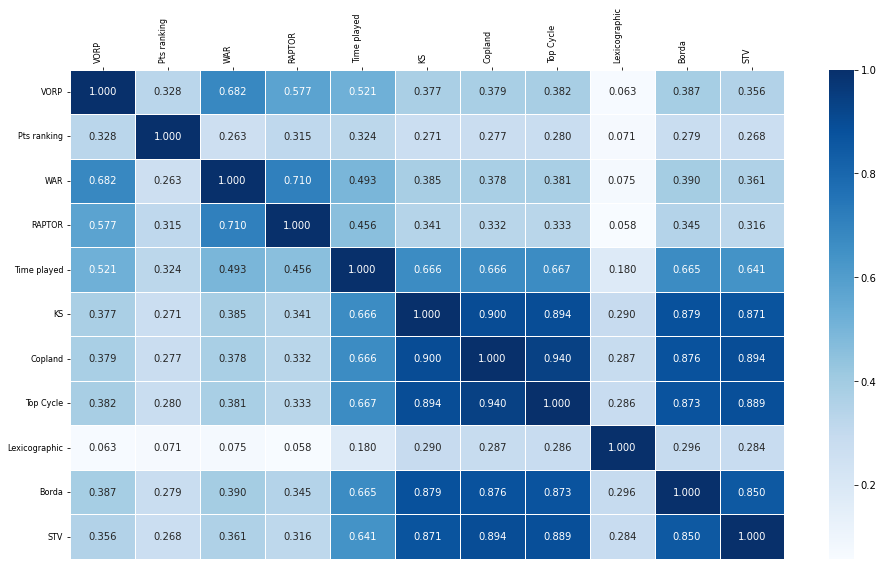

In [10]:
g = sns.heatmap(tau,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

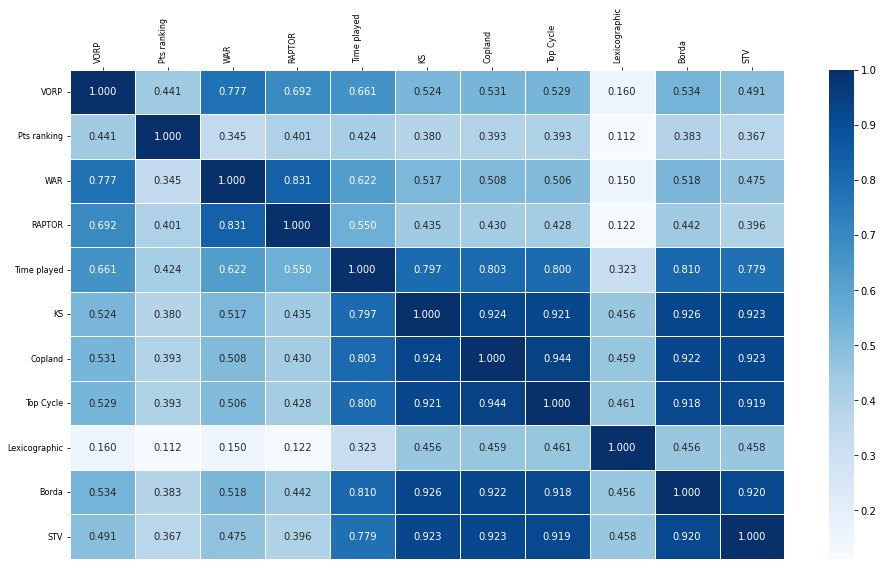

In [125]:
g = sns.heatmap(ro,annot=True,xticklabels=index,yticklabels=index,linewidths=.5, fmt=".3f", cmap='Blues')
g.tick_params(axis='both', which='major', labelsize=8, labelbottom = False, bottom=False, top = True, labeltop=True)
g.set_xticklabels(g.get_xticklabels(), fontsize = 8,rotation=90, horizontalalignment='right')
g.set_yticklabels(g.get_yticklabels(), fontsize = 8,rotation=0, horizontalalignment='right')
plt.show()

# Rankings of the players using new approach

In [ ]:
teams[16].coalitionnal_votes_based_ranking(session)